In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as sts

/tmp/ipykernel_2242936/965713650.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import scanpy as sc
import seaborn as sns
import warnings
import scanpy.external as sce
import scrublet as scr
import anndata2ri
import sys
import numba

# data load from GEO and tar decompression

In [3]:
%cd /home/fgrigoriev/proj/sc/data1

/home/fgrigoriev/proj/sc/data1


In [244]:
# MD043-006
! wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5352nnn/GSM5352972/suppl/GSM5352972%5FMD043%2D006%5Fnormal%5F1%2Etar%2Egz
! wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5352nnn/GSM5352972/suppl/GSM5352972%5FMD043%2D006%5Fnormal%5F1%2Evdj%2Etar%2Egz
    
! wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5352nnn/GSM5352973/suppl/GSM5352973%5FMD043%2D006%5Ftumor%5F1%2Etar%2Egz
! wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5352nnn/GSM5352973/suppl/GSM5352973%5FMD043%2D006%5Ftumor%5F1%2Evdj%2Etar%2Egz
    
# MD043-008
! wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5352nnn/GSM5352948/suppl/GSM5352948%5FMD043%2D008%5Fnormal%5F1%2Etar%2Egz
! wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5352nnn/GSM5352948/suppl/GSM5352948%5FMD043%2D008%5Fnormal%5F1%2Evdj%2Etar%2Egz
    
! wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5352nnn/GSM5352947/suppl/GSM5352947%5FMD043%2D008%5Ftumor%5F1%2Etar%2Egz
! wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5352nnn/GSM5352947/suppl/GSM5352947%5FMD043%2D008%5Ftumor%5F1%2Evdj%2Etar%2Egz
    
# MD043-011   
! wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5352nnn/GSM5352894/suppl/GSM5352894%5FMD043%2D011%5Fnormal%5F1%2Etar%2Egz
! wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5352nnn/GSM5352894/suppl/GSM5352894%5FMD043%2D011%5Fnormal%5F1%2Evdj%2Etar%2Egz
    
! wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5352nnn/GSM5352899/suppl/GSM5352899%5FMD043%2D011%5Ftumor%5F2%2Etar%2Egz
! wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5352nnn/GSM5352899/suppl/GSM5352899%5FMD043%2D011%5Ftumor%5F2%2Evdj%2Etar%2Egz
    
# MD01-010
! wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5352nnn/GSM5352887/suppl/GSM5352887%5FMD01%2D010%5Fnormal%5F1%2Etar%2Egz
! wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5352nnn/GSM5352887/suppl/GSM5352887%5FMD01%2D010%5Fnormal%5F1%2Evdj%2Etar%2Egz
    
! wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5352nnn/GSM5352888/suppl/GSM5352888%5FMD01%2D010%5Ftumor%5F1%2Etar%2Egz
! wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5352nnn/GSM5352888/suppl/GSM5352888%5FMD01%2D010%5Ftumor%5F1%2Evdj%2Etar%2Egz

--2023-05-21 13:01:13--  https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5352nnn/GSM5352972/suppl/GSM5352972%5FMD043%2D006%5Fnormal%5F1%2Etar%2Egz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.10, 2607:f220:41f:250::230, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45831555 (44M) [application/x-gzip]
Saving to: ‘GSM5352972_MD043-006_normal_1.tar.gz’

GSM5352972_MD043-00 100%[===================>]  43.71M  82.8MB/s    in 0.5s    

2023-05-21 13:01:14 (82.8 MB/s) - ‘GSM5352972_MD043-006_normal_1.tar.gz’ saved [45831555/45831555]

--2023-05-21 13:01:15--  https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5352nnn/GSM5352972/suppl/GSM5352972%5FMD043%2D006%5Fnormal%5F1%2Evdj%2Etar%2Egz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.10, 2607:f220:41f:250::230, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14

GSM5352887_MD01-010 100%[===================>]  16.47M  59.9MB/s    in 0.3s    

2023-05-21 13:01:25 (59.9 MB/s) - ‘GSM5352887_MD01-010_normal_1.tar.gz’ saved [17273835/17273835]

--2023-05-21 13:01:25--  https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5352nnn/GSM5352887/suppl/GSM5352887%5FMD01%2D010%5Fnormal%5F1%2Evdj%2Etar%2Egz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.10, 2607:f220:41f:250::230, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138826 (136K) [application/x-gzip]
Saving to: ‘GSM5352887_MD01-010_normal_1.vdj.tar.gz’

GSM5352887_MD01-010 100%[===================>] 135.57K  --.-KB/s    in 0.007s  

2023-05-21 13:01:25 (18.3 MB/s) - ‘GSM5352887_MD01-010_normal_1.vdj.tar.gz’ saved [138826/138826]

--2023-05-21 13:01:26--  https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5352nnn/GSM5352888/suppl/GSM5352888%5FMD01%2D010%5Ftumor%5F1%2Etar%2Egz
R

In [246]:
! gzip -d ../data1/*

In [247]:
tars = ! ls | grep  .tar

for file in tars:
    ! tar -xvf $file -C ~/proj/sc/data1

./._MD01-010_normal_1
MD01-010_normal_1/
MD01-010_normal_1/._features.tsv.gz
MD01-010_normal_1/features.tsv.gz
MD01-010_normal_1/._barcodes.tsv.gz
MD01-010_normal_1/barcodes.tsv.gz
MD01-010_normal_1/._matrix.mtx.gz
MD01-010_normal_1/matrix.mtx.gz
./._MD01-010_normal_1.vdj
MD01-010_normal_1.vdj/
MD01-010_normal_1.vdj/._filtered_contig_annotations.csv
MD01-010_normal_1.vdj/filtered_contig_annotations.csv
./._MD01-010_tumor_1
MD01-010_tumor_1/
MD01-010_tumor_1/._features.tsv.gz
MD01-010_tumor_1/features.tsv.gz
MD01-010_tumor_1/._barcodes.tsv.gz
MD01-010_tumor_1/barcodes.tsv.gz
MD01-010_tumor_1/._matrix.mtx.gz
MD01-010_tumor_1/matrix.mtx.gz
./._MD01-010_tumor_1.vdj
MD01-010_tumor_1.vdj/
MD01-010_tumor_1.vdj/._filtered_contig_annotations.csv
MD01-010_tumor_1.vdj/filtered_contig_annotations.csv
./._MD043-011_normal_1
MD043-011_normal_1/
MD043-011_normal_1/._features.tsv.gz
MD043-011_normal_1/features.tsv.gz
MD043-011_normal_1/._barcodes.tsv.gz
MD043-011_normal_1/barcodes.tsv.gz
MD043-011_nor

# Single cell RNAseq

## ann data concatenation

In [503]:
dirs = ! ls -d */ | grep -v -e 'vdj' -e data
adatas = []

for path in dirs:
    adata = sc.read_10x_mtx(path)
    adata.obs['sample'] = path
    adata.obs['pat'] = path.split('_')[0]
    adata.obs['tumor'] = 'tumor' in path
    adatas.append(adata)
    
adata = adatas[0].concatenate(adatas[1:])

/home/fgrigoriev/venvs/bior_38/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [8]:
response_dict = {
    'MD01-010': 'MPR',
    'MD043-006': 'Non-MPR',
    'MD043-008': 'MPR',
    'MD043-011': 'Non-MPR',
    'NY016-007': 'Non-MPR',
    'NY016-025': 'MPR'
}

adata.obs['response_status'] =  adata.obs.pat.map(response_dict)

## QC filtering: mito, ribo, doublets, gene counts

In [9]:
import re
ribosomal_mask = re.compile("^RP[SL][0-9]") 
adata.var_names.map(lambda x: ribosomal_mask.match(x)).notna().sum()

100

In [10]:
import re

ribosomal_mask = re.compile("^RP[SL][0-9]") 
adata.var["rp"]= adata.var_names.map(lambda x: ribosomal_mask.match(x)).notna()
adata.var["rp"].value_counts()
adata.var["mt"] = adata.var_names.str.startswith("MT-")

In [11]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'rp'], percent_top=None, log1p=False, inplace=True) # Подсчитываем QC
adata.obs.head()

sample       pat  tumor batch  \
AAACCTGAGACTAAGT-1-0  MD01-010_normal_1/  MD01-010  False     0   
AAACCTGTCTCTAAGG-1-0  MD01-010_normal_1/  MD01-010  False     0   
AAACGGGAGTTGTAGA-1-0  MD01-010_normal_1/  MD01-010  False     0   
AAACGGGCATAAAGGT-1-0  MD01-010_normal_1/  MD01-010  False     0   
AAACGGGCATGTAGTC-1-0  MD01-010_normal_1/  MD01-010  False     0   

                     response_status  n_genes_by_counts  total_counts  \
AAACCTGAGACTAAGT-1-0             MPR               1583        4355.0   
AAACCTGTCTCTAAGG-1-0             MPR               1221        2874.0   
AAACGGGAGTTGTAGA-1-0             MPR               1429        4736.0   
AAACGGGCATAAAGGT-1-0             MPR               1290        3280.0   
AAACGGGCATGTAGTC-1-0             MPR               1269        4218.0   

                      total_counts_mt  pct_counts_mt  total_counts_rp  \
AAACCTGAGACTAAGT-1-0            273.0       6.268657           1161.0   
AAACCTGTCTCTAAGG-1-0            189.0       6.576200            557.0   
AAACGGGAGTTGTAGA-1-0            295.0       6.228885           1649.0   
AAACGGGCATAAAGGT-1-0            209.0       6.371951            687.0   
AAACGGGCATGTAGTC-1-0            234.0       5.547653           1604.0   

                      pct_counts_rp  
AAACCTGAGACTAAGT-1-0      26.659012  
AAACCTGTCTCTAAGG-1-0      19.380655  
AAACGGGAGTTGTAGA-1-0      34.818413  
AAACGGGCATAAAGGT-1-0      20.945122  
AAACGGGCATGTAGTC-1-0      38.027500

In [12]:
def plot_qc(adata):
    fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(55, 10)) 

    sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0], hist_kws={"alpha":1})
    axs[0].set_xlabel("Number of UMIs per cell")
    axs[0].set_ylabel("Number of cells")
    axs[0].set_title("total counts")

    sns.distplot(adata.obs["n_genes_by_counts"], kde=False, ax=axs[1], hist_kws={"alpha":1})
    axs[1].set_xlabel("Number of expressed genes per cell")
    axs[1].set_ylabel("Number of cells")
    axs[1].set_title("n_genes_by_counts")

    sns.distplot(adata.obs["pct_counts_mt"], kde=False, ax=axs[2], hist_kws={"alpha":1})
    axs[2].set_xlabel("Persentage of mitochondrial expression per cell")
    axs[2].set_ylabel("Number of cells")
    axs[2].set_title("pct_counts_mt")

    sns.distplot(adata.obs["pct_counts_rp"], kde=False, ax=axs[3], hist_kws={"alpha":1})
    axs[3].set_xlabel("Persentage of ribosomal expression per cell")
    axs[3].set_ylabel("Number of cells")
    axs[3].set_title("pct_counts_rp")

/home/fgrigoriev/venvs/bior_38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


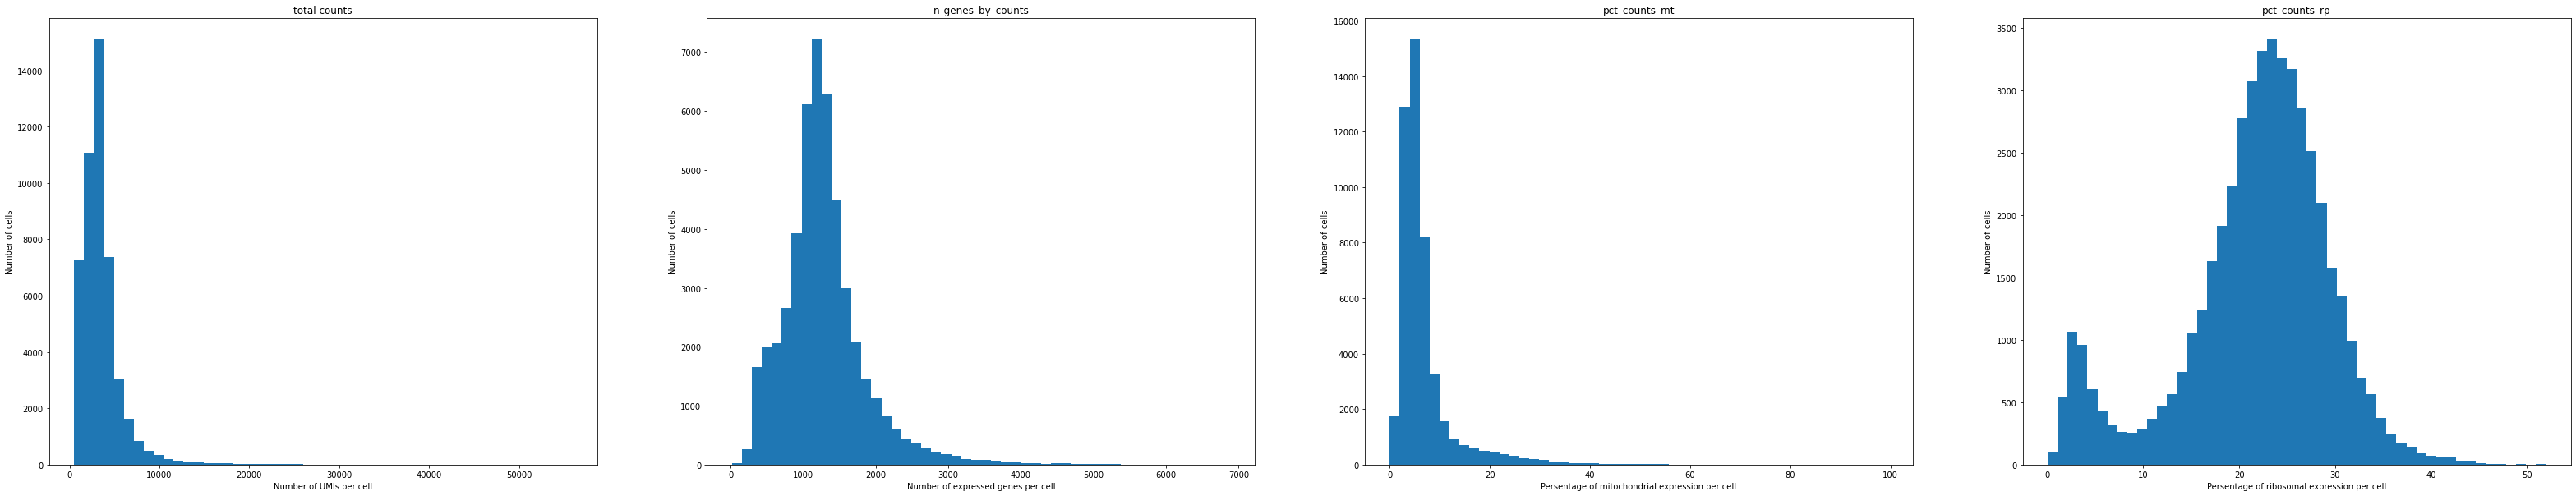

In [13]:
plot_qc(adata)

In [14]:
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"
ribo_genes = pd.read_table(ribo_url, header=[1])

In [15]:
adata_filtered = adata.copy()

adata_filtered = adata_filtered[adata_filtered.obs['total_counts'] > 100]
adata_filtered = adata_filtered[adata_filtered.obs['pct_counts_mt'] < 10]
adata_filtered = adata_filtered[adata_filtered.obs['pct_counts_rp'] > 10] 
adata_filtered = adata_filtered[adata_filtered.obs['n_genes_by_counts'] > 250] 
adata_filtered = adata_filtered[adata_filtered.obs['n_genes_by_counts'] < 1149 + 3 * 550] 

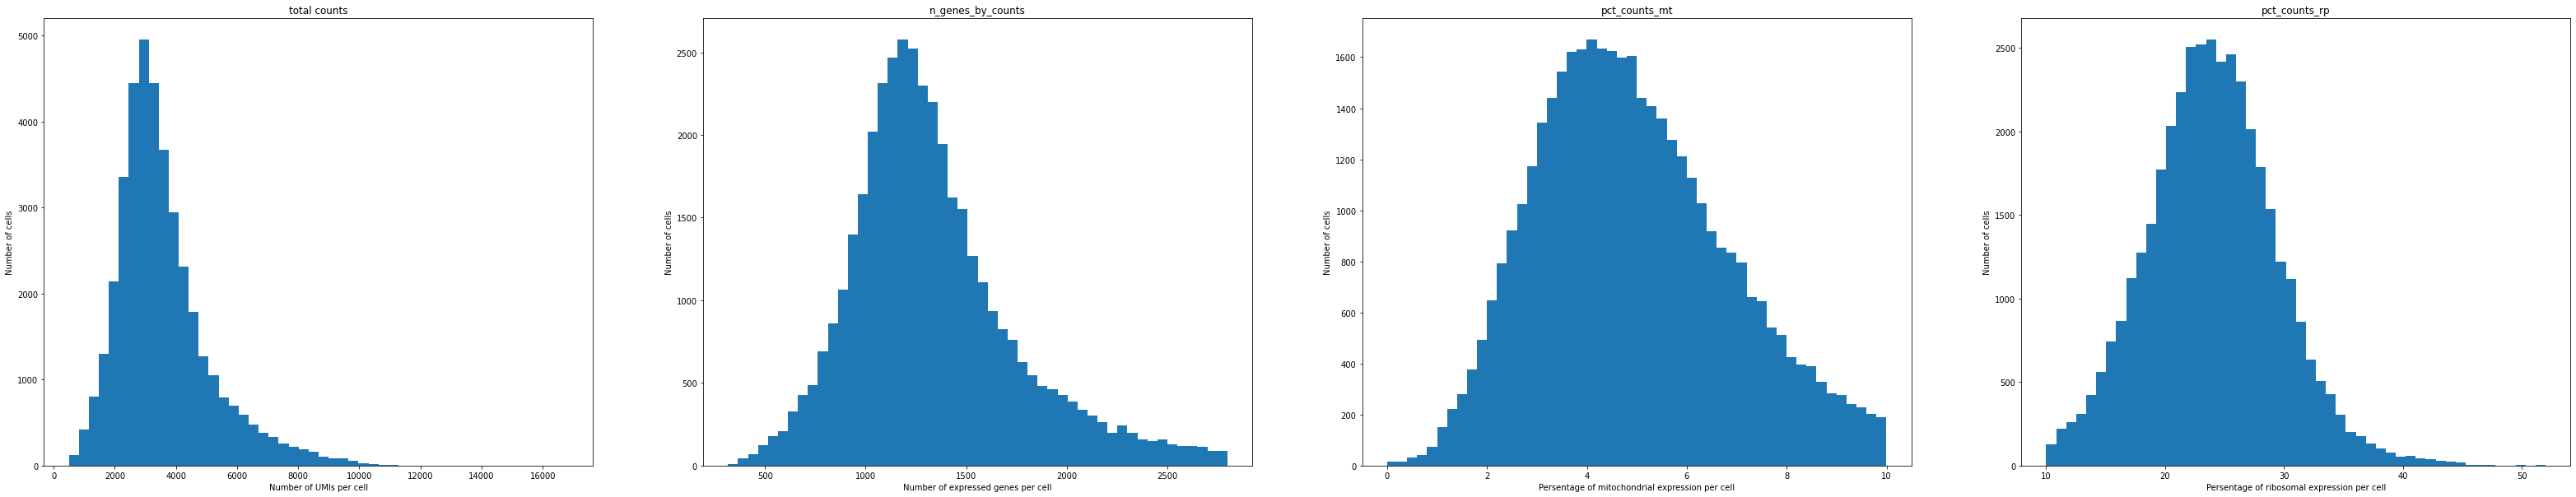

In [16]:
plot_qc(adata_filtered)

## getting rid of TCR, ribosomal and IG genes

In [17]:
genes = pd.Series(adata_filtered.var.index)
list(genes[genes.apply(lambda x: x.startswith('TRA') | x.startswith('TRB') | x.startswith('TRC'))].values)[:4]

['TRAPPC3', 'TRABD2B', 'TRAF3IP3', 'TRAF5']

In [18]:
tcr_mask = re.compile("^TR[ABDG][VDJ][0-9]*") 
tcr_mask = adata_filtered.var_names.map(lambda x: tcr_mask.match(x)).notna()
adata_filtered = adata_filtered[:, ~tcr_mask]

In [19]:
rb_mask = re.compile("^RP.*") 
rb_mask = adata_filtered.var_names.map(lambda x: rb_mask.match(x)).notna()
adata_filtered = adata_filtered[:, ~rb_mask]

In [20]:
adata_filtered = adata_filtered[:, ~adata_filtered.var_names.isin(ribo_genes.values.flatten())]

In [21]:
ifnI_genes = 'Adar Cactin Cdc37 Cnot7 Dcst1 Fadd Hdac4 Ifih1 Ifitm1 Ifitm2 Ifitm3 Ifitm3 Ifitm6 Ifitm7 Ifna1 Ifnar1 Ifnar1 Ifnar1 Ifnar1 Ifnar1 Ifnar2 Ifnar2 Ifnb1 Ifnb1 Ikbke Ikbke Irak1 Irf3 Irf3 Irf7 Irf7 Isg15 Jak1 Lsm14a Mavs Mettl3 Mmp12 Mmp12 Mul1 Myd88 Nlrc5 Nlrc5 Nlrc5 Nlrc5 Oas1a Oas1a Oas1b Oas1b Oas1c Oas1c Oas1d Oas1d Oas1e Oas1e Oas1f Oas1f Oas1g Oas1g Oas1h Oas1h Oas2 Oas3 Ptpn2 Ptpn2 Ptpn2 Rbm47 Rfpl4b Rnf185 Samhd1 Samhd1 Stat1 Stat1 Stat1 Stat1 Stat2 Stat2 Stat2 Stat2 Stat2 Stat2 Sting1 Sting1 Tbk1 Trex1 Trex1 Trim6 Trim6 Trim41 Trim56 Trim56 Trim56 Trim65 Ttll12 Tyk2 Ube2k Usp27x Usp29 Wnt5a Ythdf2 Ythdf3 Zbp1 Zbp1'.split()
ifnI_genes = list(map(lambda x: x.upper(), ifnI_genes))

adata_filtered = adata_filtered[:, ~adata_filtered.var_names.isin(ifnI_genes)]

In [22]:
mt_mask = re.compile("^MT-.*") 
mt_mask = adata_filtered.var_names.map(lambda x: mt_mask.match(x)).notna()
adata_filtered.var_names[mt_mask]

Index(['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3',
       'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB'],
      dtype='object')

In [23]:
ig_genes = 'IGBP1 IGBP1-AS1 IGBP1-AS2 IGBP1P1 IGBP1P3 IGBP1P4 IGBP1P5 IGHA1 IGHA2 IGHD IGHD1-1 IGHD1-14 IGHD1-20 IGHD1-26 IGHD1-7 IGHD1OR15-1A IGHD1OR15-1B IGHD2-15 IGHD2-2 IGHD2-21 IGHD2-8 IGHD2OR15-2A IGHD2OR15-2B IGHD3-10 IGHD3-16 IGHD3-22 IGHD3-3 IGHD3-9 IGHD3OR15-3A IGHD3OR15-3B IGHD4-11 IGHD4-17 IGHD4-23 IGHD4-4 IGHD4OR15-4A IGHD4OR15-4B IGHD5-12 IGHD5-18 IGHD5-24 IGHD5-5 IGHD5OR15-5A IGHD5OR15-5B IGHD6-13 IGHD6-19 IGHD6-25 IGHD6-6 IGHD7-27 IGHE IGHEP1 IGHEP2 IGHG1 IGHG2 IGHG3 IGHG4 IGHGP IGHJ1 IGHJ1P IGHJ2 IGHJ2P IGHJ3 IGHJ3P IGHJ4 IGHJ5 IGHJ6 IGHM IGHMBP2 IGHV1-12 IGHV1-14 IGHV1-17 IGHV1-18 IGHV1-2 IGHV1-24 IGHV1-3 IGHV1-45 IGHV1-46 IGHV1-58 IGHV1-67 IGHV1-68 IGHV1-69 IGHV1-8 IGHV1OR15-1 IGHV1OR15-2 IGHV1OR15-3 IGHV1OR15-4 IGHV1OR15-6 IGHV1OR15-9 IGHV1OR16-1 IGHV1OR16-2 IGHV1OR16-3 IGHV1OR16-4 IGHV1OR21-1 IGHV2-10 IGHV2-26 IGHV2-5 IGHV2-70 IGHV2OR16-5 IGHV3-11 IGHV3-13 IGHV3-15 IGHV3-16 IGHV3-19 IGHV3-20 IGHV3-21 IGHV3-22 IGHV3-23 IGHV3-25 IGHV3-29 IGHV3-30 IGHV3-30-2 IGHV3-32 IGHV3-33 IGHV3-33-2 IGHV3-35 IGHV3-36 IGHV3-37 IGHV3-38 IGHV3-41 IGHV3-42 IGHV3-43 IGHV3-47 IGHV3-48 IGHV3-49 IGHV3-50 IGHV3-52 IGHV3-53 IGHV3-54 IGHV3-57 IGHV3-6 IGHV3-60 IGHV3-62 IGHV3-63 IGHV3-64 IGHV3-65 IGHV3-66 IGHV3-7 IGHV3-71 IGHV3-72 IGHV3-73 IGHV3-74 IGHV3-75 IGHV3-76 IGHV3-79 IGHV3-9 IGHV3OR15-7 IGHV3OR16-10 IGHV3OR16-11 IGHV3OR16-12 IGHV3OR16-13 IGHV3OR16-15 IGHV3OR16-6 IGHV3OR16-7 IGHV3OR16-8 IGHV3OR16-9 IGHV4-28 IGHV4-31 IGHV4-34 IGHV4-39 IGHV4-4 IGHV4-55 IGHV4-59 IGHV4-61 IGHV4-80 IGHV4OR15-8 IGHV5-51 IGHV5-78 IGHV6-1 IGHV7-27 IGHV7-34-1 IGHV7-40 IGHV7-56 IGHV7-81 IGHVII-1-1 IGHVII-15-1 IGHVII-20-1 IGHVII-22-1 IGHVII-26-2 IGHVII-28-1 IGHVII-30-1 IGHVII-31-1 IGHVII-33-1 IGHVII-40-1 IGHVII-43-1 IGHVII-44-2 IGHVII-46-1 IGHVII-49-1 IGHVII-51-2 IGHVII-53-1 IGHVII-60-1 IGHVII-62-1 IGHVII-65-1 IGHVII-67-1 IGHVII-74-1 IGHVII-78-1 IGHVIII-11-1 IGHVIII-13-1 IGHVIII-16-1 IGHVIII-2-1 IGHVIII-22-2 IGHVIII-25-1 IGHVIII-26-1 IGHVIII-38-1 IGHVIII-44 IGHVIII-47-1 IGHVIII-5-1 IGHVIII-5-2 IGHVIII-51-1 IGHVIII-67-2 IGHVIII-67-3 IGHVIII-67-4 IGHVIII-76-1 IGHVIII-82 IGHVIV-44-1 IGJ IGJCOR18 IGJP1 IGKC IGKJ1 IGKJ2 IGKJ3 IGKJ4 IGKJ5 IGKV1-12 IGKV1-13 IGKV1-16 IGKV1-17 IGKV1-22 IGKV1-27 IGKV1-32 IGKV1-33 IGKV1-35 IGKV1-37 IGKV1-39 IGKV1-5 IGKV1-6 IGKV1-8 IGKV1-9 IGKV1D-12 IGKV1D-13 IGKV1D-16 IGKV1D-17 IGKV1D-22 IGKV1D-27 IGKV1D-32 IGKV1D-33 IGKV1D-35 IGKV1D-37 IGKV1D-39 IGKV1D-42 IGKV1D-43 IGKV1D-8 IGKV1OR-1 IGKV1OR-2 IGKV1OR-3 IGKV1OR10-1 IGKV1OR2-108 IGKV1OR2-11 IGKV1OR2-118 IGKV1OR2-3 IGKV1OR2-6 IGKV1OR2-9 IGKV1OR22-1 IGKV1OR22-5 IGKV2-10 IGKV2-14 IGKV2-18 IGKV2-19 IGKV2-23 IGKV2-24 IGKV2-26 IGKV2-28 IGKV2-29 IGKV2-30 IGKV2-36 IGKV2-38 IGKV2-4 IGKV2-40 IGKV2D-10 IGKV2D-14 IGKV2D-18 IGKV2D-19 IGKV2D-23 IGKV2D-24 IGKV2D-26 IGKV2D-28 IGKV2D-29 IGKV2D-30 IGKV2D-36 IGKV2D-38 IGKV2D-40 IGKV2OR2-1 IGKV2OR2-10 IGKV2OR2-2 IGKV2OR2-7 IGKV2OR2-7D IGKV2OR2-8 IGKV2OR22-3 IGKV2OR22-4 IGKV3-11 IGKV3-15 IGKV3-20 IGKV3-25 IGKV3-31 IGKV3-34 IGKV3-7 IGKV3D-11 IGKV3D-15 IGKV3D-20 IGKV3D-25 IGKV3D-31 IGKV3D-34 IGKV3D-7 IGKV3OR2-268 IGKV3OR2-5 IGKV3OR22-2 IGKV4-1 IGKV5-2 IGKV6-21 IGKV6D-21 IGKV6D-41 IGKV7-3 IGLC1 IGLC2 IGLC3 IGLC4 IGLC5 IGLC6 IGLC7 IGLCOR22-1 IGLCOR22-2 IGLJ1 IGLJ2 IGLJ3 IGLJ4 IGLJ5 IGLJ6 IGLJ7 IGLL1 IGLL3P IGLL5 IGLON5 IGLV1-36 IGLV1-40 IGLV1-41 IGLV1-44 IGLV1-47 IGLV1-50 IGLV1-51 IGLV1-62 IGLV10-54 IGLV10-67 IGLV11-55 IGLV2-11 IGLV2-14 IGLV2-18 IGLV2-23 IGLV2-28 IGLV2-33 IGLV2-34 IGLV2-5 IGLV2-8 IGLV3-1 IGLV3-10 IGLV3-12 IGLV3-13 IGLV3-15 IGLV3-16 IGLV3-17 IGLV3-19 IGLV3-2 IGLV3-21 IGLV3-22 IGLV3-24 IGLV3-25 IGLV3-26 IGLV3-27 IGLV3-29 IGLV3-30 IGLV3-31 IGLV3-32 IGLV3-4 IGLV3-6 IGLV3-7 IGLV3-9 IGLV4-3 IGLV4-60 IGLV4-69 IGLV5-37 IGLV5-45 IGLV5-48 IGLV5-52 IGLV6-57 IGLV7-35 IGLV7-43 IGLV7-46 IGLV8-61 IGLV8OR8-1 IGLV9-49 IGLVI-20 IGLVI-38 IGLVI-42 IGLVI-56 IGLVI-63 IGLVI-68 IGLVI-70 IGLVIV-53 IGLVIV-59 IGLVIV-64 IGLVIV-65 IGLVIV-66-1 IGLVIVOR22-1 IGLVIVOR22-2 IGLVV-58 IGLVV-66 IGLVVI-22-1 IGLVVI-25-1 IGLVVII-41-1 IGSF1 IGSF10 IGSF11 IGSF11-AS1 IGSF21 IGSF22 IGSF23 IGSF3 IGSF5 IGSF6 IGSF8 IGSF9 IGSF9B'.split()
ig_genes = list(map(lambda x: x.upper(), ig_genes))

adata_filtered = adata_filtered[:, ~adata_filtered.var_names.isin(ig_genes)]

## Doublet filtering

In [24]:
scrub = scr.Scrublet(adata_filtered.X)
doublet_scores, predicted_doublets = scrub.scrub_doublets()

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.25
Detected doublet rate = 10.5%
Estimated detectable doublet fraction = 69.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 15.1%
Elapsed time: 241.5 seconds


In [25]:
adata_filtered = adata_filtered[~predicted_doublets]

## TPM Normalisation and log transform

In [26]:
print("Sum UMIs rep cell before:", adata_filtered.X.sum(axis=1).T)

sc.pp.normalize_total(adata_filtered, target_sum=1e4) 
print("Sum UMIs rep cell after:", adata_filtered.X.sum(axis=1).T)

sc.pp.log1p(adata_filtered) 

adata_filtered.raw = adata_filtered # adata_filtered.raw.to_adata() to return expressions

Sum UMIs rep cell before: [[3090. 2262. 2923. ... 3179. 3133. 4612.]]


/home/fgrigoriev/venvs/bior_38/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Sum UMIs rep cell after: [[10000.    10000.001 10000.001 ...  9999.999  9999.999 10000.001]]


In [27]:
sc.pp.highly_variable_genes(adata_filtered, n_top_genes=3000) 
adata_filtered.raw = adata_filtered
adata_filtered = adata_filtered[:, adata_filtered.var.highly_variable]

In [28]:
adata_filtered.obs['tumor'] = adata_filtered.obs['tumor'].map({True: 'Tumor', False: 'Norm'})

/tmp/ipykernel_2242936/1208101555.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_filtered.obs['tumor'] = adata_filtered.obs['tumor'].map({True: 'Tumor', False: 'Norm'})


In [29]:
sc.pp.scale(adata_filtered, max_value=10)

## PCA

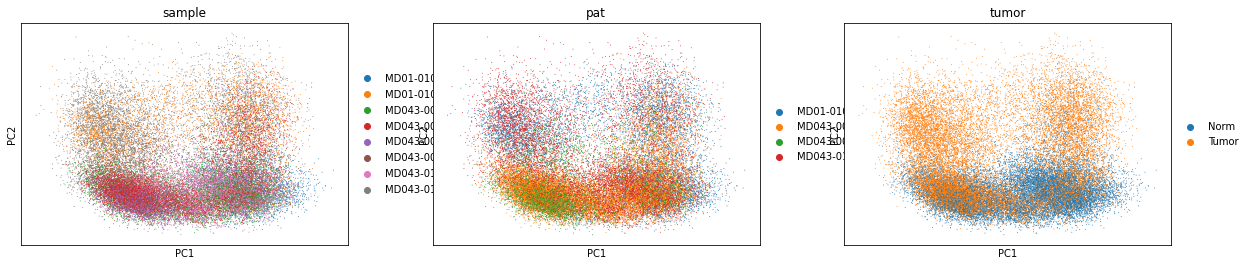

In [30]:
sc.tl.pca(adata_filtered) 
sc.pl.pca(adata_filtered, frameon=True, color=['sample', 'pat', 'tumor']) 

## UMAP

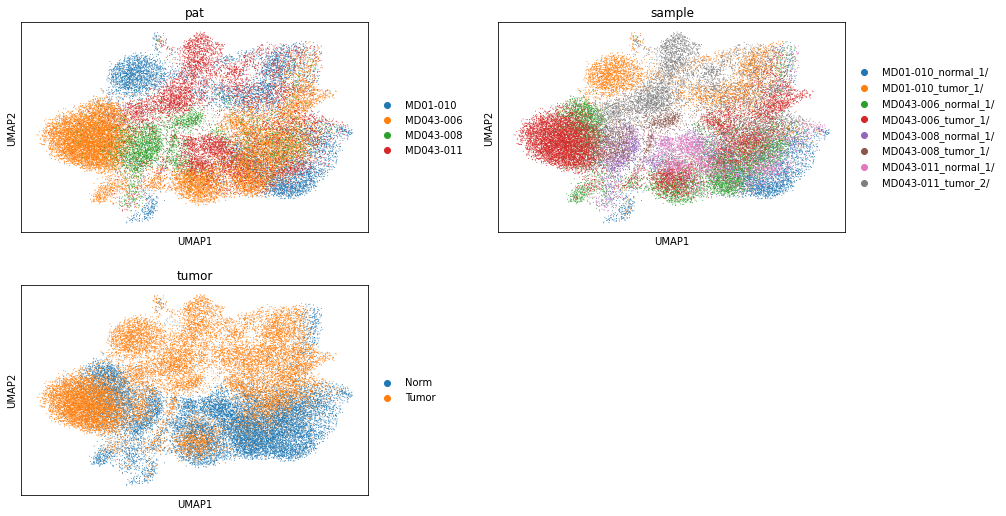

In [31]:
sc.pp.neighbors(adata_filtered, n_neighbors=18) 
sc.tl.umap(adata_filtered, min_dist=1) 
sc.pl.umap(adata_filtered, color=['pat', 'sample', 'tumor'], ncols=2, show=True, wspace=.25);
plt.show()

## Batch correction

2023-05-21 08:37:33,527 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-05-21 08:38:33,230 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-05-21 08:38:33,619 - harmonypy - INFO - Iteration 1 of 10
2023-05-21 08:39:01,851 - harmonypy - INFO - Iteration 2 of 10
2023-05-21 08:39:29,742 - harmonypy - INFO - Iteration 3 of 10
2023-05-21 08:39:59,069 - harmonypy - INFO - Iteration 4 of 10
2023-05-21 08:40:26,516 - harmonypy - INFO - Iteration 5 of 10
2023-05-21 08:40:47,389 - harmonypy - INFO - Iteration 6 of 10
2023-05-21 08:41:06,438 - harmonypy - INFO - Iteration 7 of 10
2023-05-21 08:41:21,499 - harmonypy - INFO - Iteration 8 of 10
2023-05-21 08:41:37,182 - harmonypy - INFO - Iteration 9 of 10
2023-05-21 08:41:51,017 - harmonypy - INFO - Converged after 9 iterations


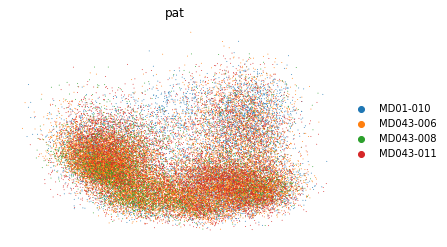

In [32]:
sce.pp.harmony_integrate(adata_filtered, key='pat')
sc.pl.embedding(adata_filtered, basis='X_pca_harmony', color='pat',frameon=False)

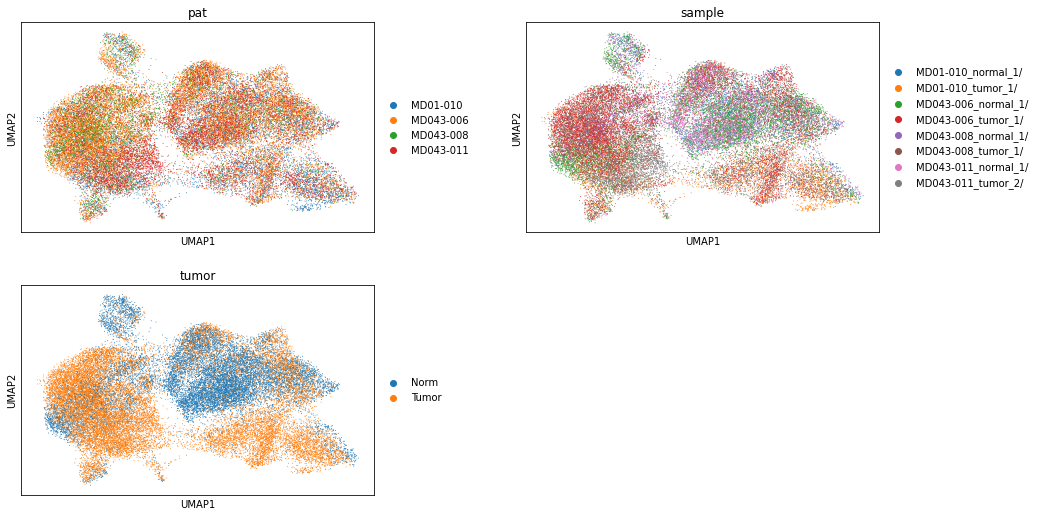

In [33]:
sc.pp.neighbors(adata_filtered, n_neighbors=20, use_rep='X_pca_harmony') 
sc.tl.umap(adata_filtered, min_dist=.6) 

sc.pl.umap(adata_filtered, color=['pat', 'sample', 'tumor'], show=False, ncols=2, wspace=.3);

## Clustering and annotation

Here I clusterize T cells and annotate them in accordance to cell specific markers.

In [71]:
sc.tl.leiden(adata_filtered, resolution=.9)
adata_filtered.obs.leiden.nunique()

12

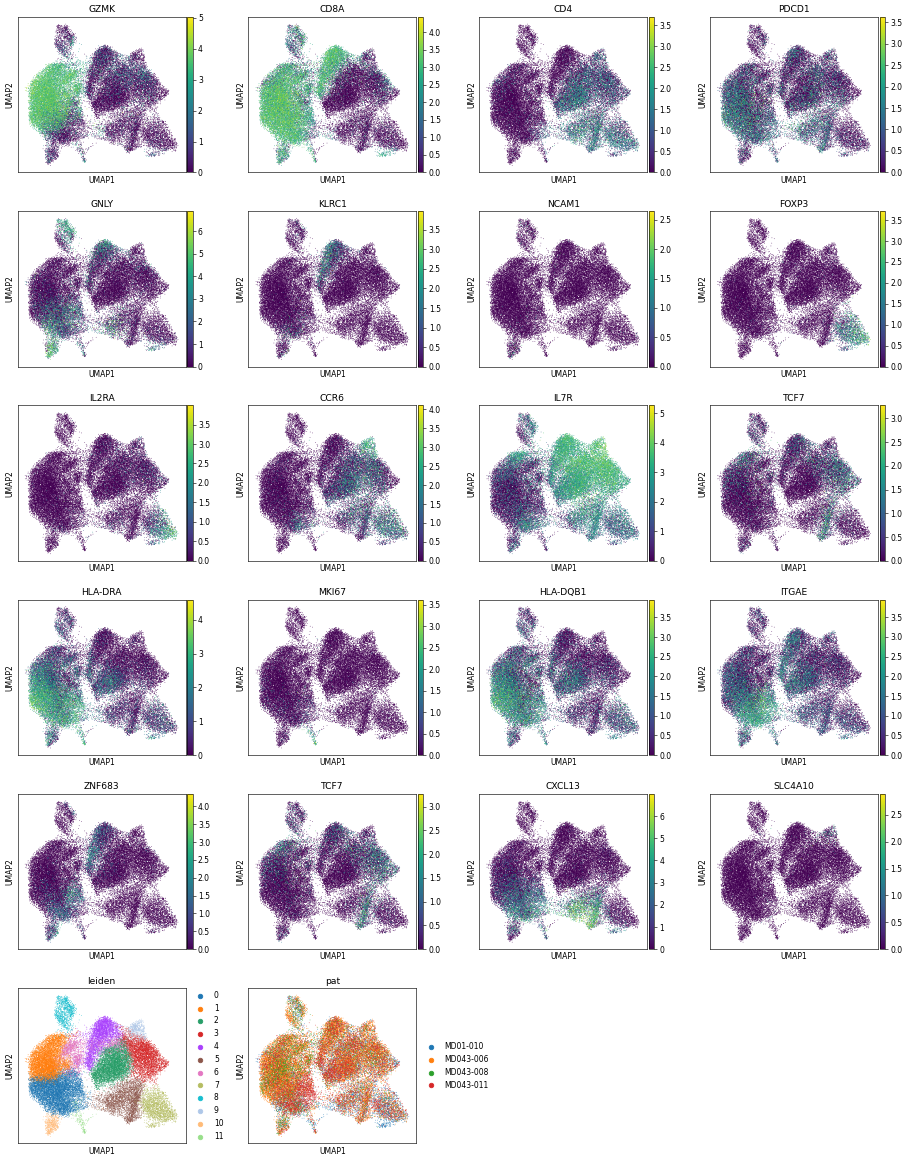

In [525]:
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (55)}):
    sc.pl.umap(adata_filtered, color=['GZMK', 'CD8A', 'CD4', 'PDCD1', 'GNLY', 'KLRC1', 'NCAM1',
                                      'FOXP3','IL2RA', 'CCR6', 'IL7R', 'TCF7', 'HLA-DRA', 'MKI67', 'HLA-DQB1',
                                      'ITGAE', 'ZNF683', 'TCF7', 'CXCL13', 'SLC4A10',
                                      'leiden', 'pat'],
               show=True, ncols=4, wspace=.25, use_raw=True);

In [34]:
genes = '''EOMES GZMK CRTAM NKG7 GNLY S1PR5 LINC02446 ZNF683 ITGAE STMN1 TUBB MKI67 
           HLA-DRA HLA-DQA1 HLA-DQB1 CCR6 IL4I1 SLC4A10 SELL CCR7 TCF7 IL7R GPR183 
           CD40LG PLIN2 CXCR6 ALOX5AP MT1X MT1E S100A11 CXCL13 FAAH2 NR3C1 MAF PTPN13
           KLRB1 FOXP3 CCR8 IL2RA'''.split()

In [96]:
leiden2celltype = {
    '0': 'CD8-mem1',
    '1': 'CD8-eff2',
    '2': 'CD4-helper1',
    '3': 'CD4-helper2',
    '4': 'CD8-NK',
    '5': 'CD4-f. helper',
    '6': 'CD8-eff3',
    '7': 'CD4-T reg',
    '8': 'CD8-eff1',
    '9': 'MAIT',
    '10': 'CD8-mem2',
    '11': 'CD8-proliferating',
    '12': 'CD8-eff1'
}

adata_filtered.obs['Cell_type'] = adata_filtered.obs['leiden'].map(leiden2celltype).astype('category')

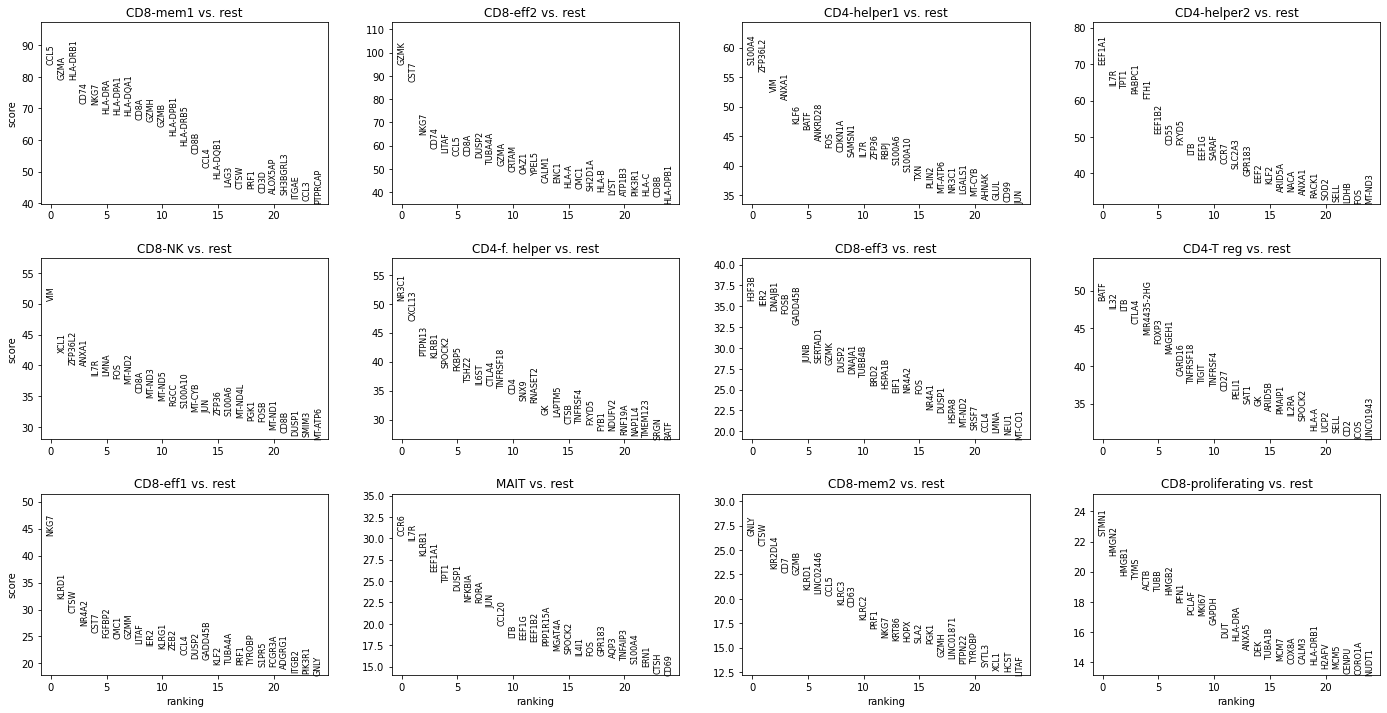

In [156]:
# adata_filtered.uns['log1p']["base"] = None
sc.tl.rank_genes_groups(adata_filtered, 'Cell_type', method='wilcoxon')
sc.pl.rank_genes_groups(adata_filtered, n_genes=25, sharey=False)

In [98]:
top_genes = pd.DataFrame(adata_filtered.uns['rank_genes_groups']['names'])

In [145]:
top_genes.head(3)

CD8-mem1 CD8-eff2 CD4-helper1 CD4-helper2   CD8-NK CD4-f. helper CD8-eff3  \
0      CCL5     GZMK      S100A4      EEF1A1      VIM         NR3C1    H3F3B   
1      GZMA     CST7     ZFP36L2        IL7R     XCL1        CXCL13     IER2   
2  HLA-DRB1     NKG7         VIM        TPT1  ZFP36L2        PTPN13   DNAJB1   

  CD4-T reg CD8-eff1   MAIT CD8-mem2 CD8-proliferating  
0      BATF     NKG7   CCR6     GNLY             STMN1  
1      IL32    KLRD1   IL7R     CTSW             HMGN2  
2       LTB     CTSW  KLRB1  KIR2DL4             HMGB1

In [166]:
marker_genes_dict = {'СD markers': ['CD4', 'CD8A'],
                     'Effector': ['GZMK', 'GZMA', 'NKG7', 'GZMB', 'GNLY', 'S1PR5'],
                     'NK': ['KLRC1'],
                     'Memory': ['LINC02446', 'ZNF683', 'ITGAE',],
                     'Proliferation': ['MKI67', 'TUBB', 'STMN1'],
                     'MAIT': ['CCR6', 'IL4I1', 'SLC4A10'],
                     'CD4-foll. helper': ['CXCL13'],
                     'CD4-helper': ['S100A11', 'IL7R', 'GPR183', 'PLIN2',
                                  'CXCR6', 'MT1X'],
                     'T-reg': ['FOXP3', 'CCR8','IL2RA'],
                     'Checkpoint': ['ENTPD1', 'CTLA4', 'TIMP3', 'TIGIT', 'ENTPD1', 'LAG3']
}

categories: CD8-mem1, CD8-eff2, CD4-helper1, etc.
var_group_labels: СD markers, Effector, NK, etc.


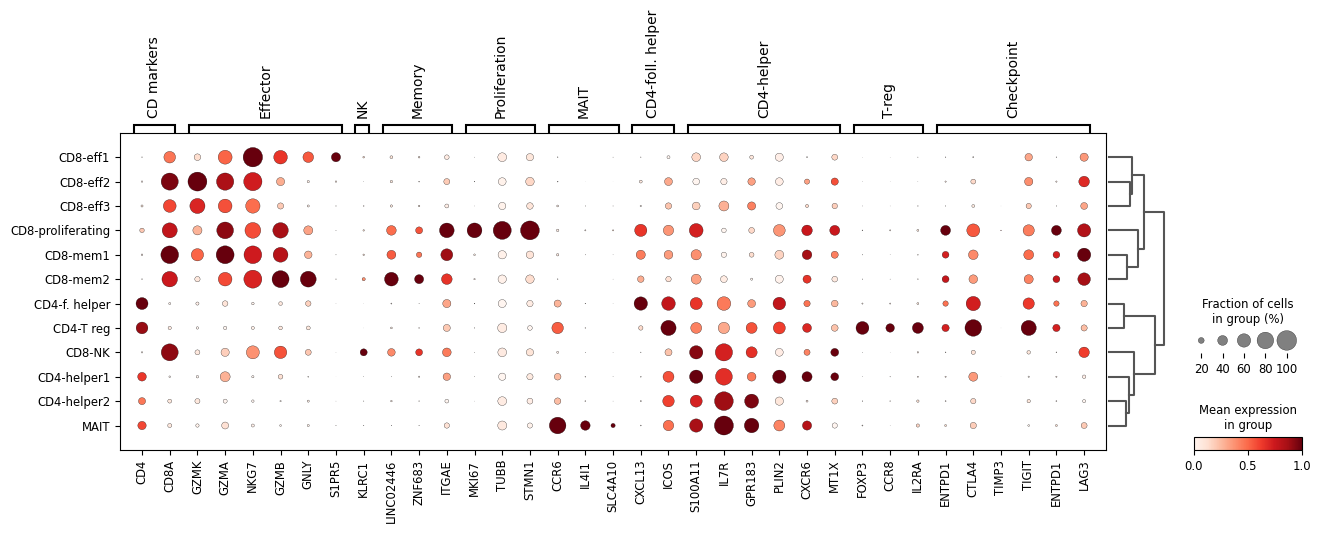

In [154]:
sc.tl.dendrogram(adata_filtered, groupby='Cell_type')
with plt.rc_context({"figure.dpi": (100)}):
    sc.pl.dotplot(adata_filtered, marker_genes_dict, groupby='Cell_type',
                  use_raw=False, dendrogram=True, swap_axes=False, 
                  standard_scale='var', vmin=0);

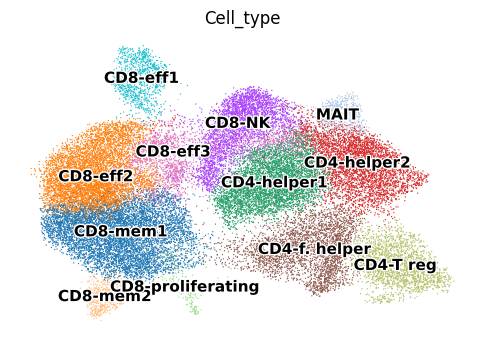

In [532]:
with plt.rc_context({"figure.dpi": (100)}):
    sc.pl.umap(adata_filtered, color=['Cell_type'], legend_loc='on data', 
               legend_fontoutline=2, legend_fontsize=11, show=True, frameon=False);

In [120]:
adata_filtered.obs['Sample_type'] = adata_filtered.obs['tumor']
tumor_mask = adata_filtered.obs['Sample_type'] == 'Tumor'

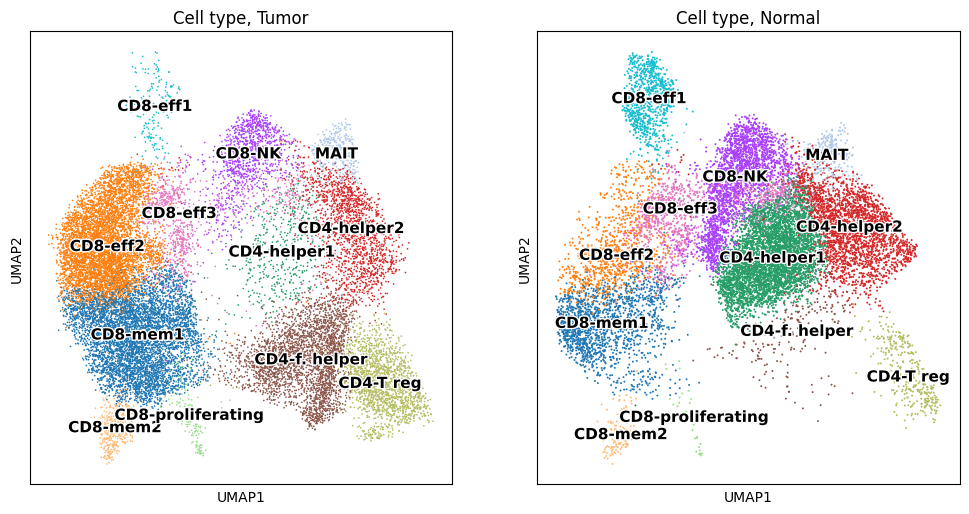

In [533]:
with plt.rc_context({"figure.dpi": (100)}):
    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))

    sc.pl.umap(adata_filtered[tumor_mask], color=['Cell_type'], legend_loc='on data', 
               legend_fontoutline=2, legend_fontsize=11, ax=axs[0], show=False)
    axs[0].set_title('Cell type, Tumor')

    sc.pl.umap(adata_filtered[~tumor_mask], color=['Cell_type'], legend_loc='on data', 
               legend_fontoutline=2, legend_fontsize=11, ax=axs[1], show=False)
    axs[1].set_title('Cell type, Normal')

    plt.show()

> Tumor immune microenvironment is visibly enriched with CD8+ cells, namely CD8+ eff2 and mem1. It is also enriched in CD4+ Follicular helpers and T regs

> Normal immune microenvironment is enriched with CD4+ helpers and also with CD8+ eff1 CD8+ NK cells

In [168]:
geneset = marker_genes_dict['Checkpoint']
sc.tl.score_genes(adata_filtered, gene_list=geneset, score_name='Checkpoint',
                     use_raw=True)

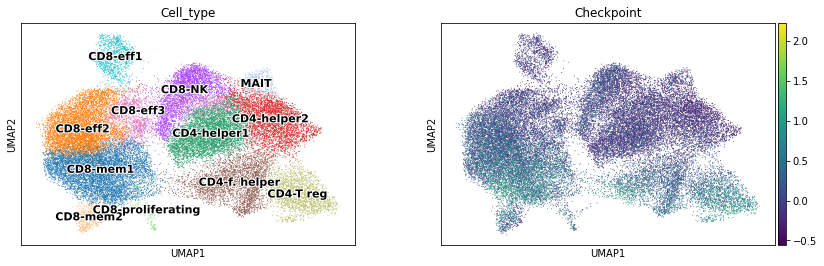

In [169]:
sc.pl.umap(adata_filtered, color=['Cell_type', 'Checkpoint'], legend_loc='on data', 
           legend_fontoutline=2, legend_fontsize=11, show=True);

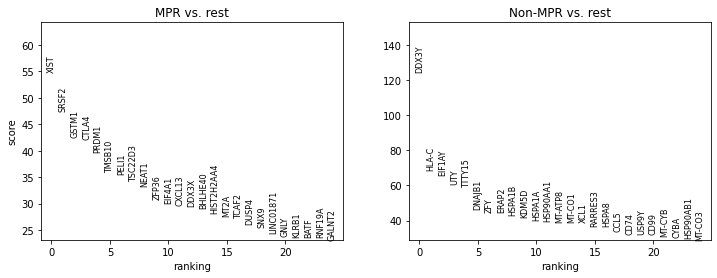

In [155]:
sc.tl.rank_genes_groups(adata_filtered, 'response_status', method='t-test')
sc.pl.rank_genes_groups(adata_filtered, n_genes=25, sharey=False)

# TCR analysis

## TCR concatenation

In [248]:
import scirpy 

dirs = ! ls -d */ | grep 'vdj'
vdjs = []

for path in dirs:
    filepath = '/'.join((path, 'filtered_contig_annotations.csv'))
    vdj = scirpy.io.read_10x_vdj(filepath)
    vdj.obs['batch_name'] = path.split('.')[0]
    vdjs.append(vdj)

adata_vdj = vdjs[0].concatenate(vdjs[1:])

In [197]:
# adata_filtered.write_h5ad('/home/fgrigoriev/proj/sc/adata_filtered_clean_clustered.h5ad')

In [249]:
# adata_filtered = sc.read_h5ad('/home/fgrigoriev/proj/sc/adata_filtered_clean_clustered.h5ad')

## TCRseq + RNAseq merge

In [253]:
adata_vdj.obs['batch'] = adata_vdj.obs['batch_name']
adata_filtered.obs['batch'] = adata_filtered.obs['sample'].apply(lambda x: x[:-1]).astype(str)

In [258]:
adata_vdj.obs['batch'].unique() == adata_filtered.obs['batch'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [260]:
adata_filtered.shape, adata_vdj.shape

((35385, 3000), (35726, 0))

In [261]:
scirpy.pp.merge_with_ir(adata_filtered, adata_vdj, on=['batch'])

In [262]:
adata_filtered.shape

(35385, 3000)

In [267]:
adata_filtered.obs['has_ir'] = adata_filtered.obs['has_ir'].map({'True': True, 'None': False})
adata_filtered.obs['has_ir'].value_counts()

True     29607
False     5778
Name: has_ir, dtype: int64

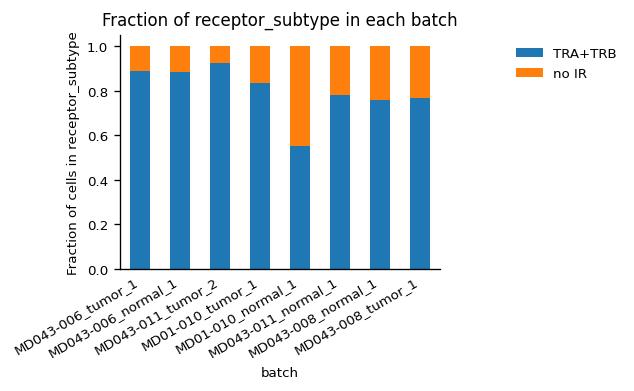

In [269]:
import scirpy as ir
ir.tl.chain_qc(adata_filtered)
ax = ir.pl.group_abundance(adata_filtered, groupby="batch", target_col="receptor_subtype", normalize=True)

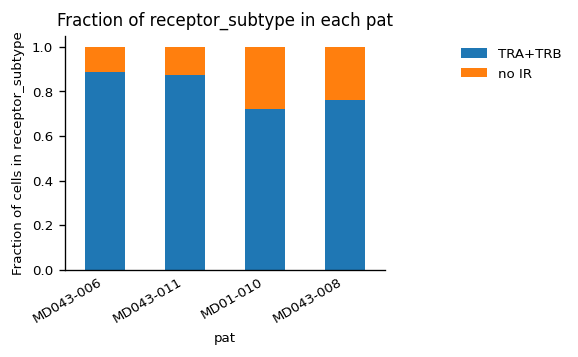

In [272]:
ax = ir.pl.group_abundance(adata_filtered, groupby="pat", target_col="receptor_subtype", normalize=True)

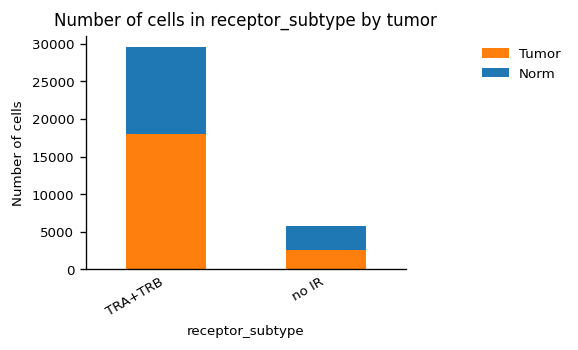

In [271]:
ax = ir.pl.group_abundance(adata_filtered, groupby="receptor_subtype", target_col="tumor")

In [270]:
adata_filtered.obs.groupby('sample')['has_ir'].value_counts()

sample               has_ir
MD01-010_normal_1/   True      1600
                     False     1301
MD01-010_tumor_1/    True      3655
                     False      718
MD043-006_normal_1/  True      6221
                     False      828
MD043-006_tumor_1/   True      8585
                     False     1048
MD043-008_normal_1/  True      1620
                     False      510
MD043-008_tumor_1/   True      1331
                     False      404
MD043-011_normal_1/  True      2199
                     False      617
MD043-011_tumor_2/   True      4396
                     False      352
Name: has_ir, dtype: int64

## TCR analysis

In [273]:
def plot_pair(pl, adata, mask, labels, **kwargs):
    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 7), sharey=False)

    pl(adata[mask], **kwargs, ax=axs[0])
    pl(adata[~mask], **kwargs, ax=axs[1])
    
    title = axs[0].title._text+'\n'
    
    axs[0].set_title(labels[0])
    axs[1].set_title(labels[1])
    
    plt.suptitle(title)

In [277]:
adata_filtered.obs['T_Cell_type'] = adata_filtered.obs.Cell_type.apply(lambda x: 'CD8+' if 'CD8' in x else 'CD4+')

In [278]:
cd4_mask = adata_filtered.obs['T_Cell_type'] == 'CD4+'

### Chain pairing

In [ ]:
ir.pl.group_abundance?

/home/fgrigoriev/venvs/bior_38/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


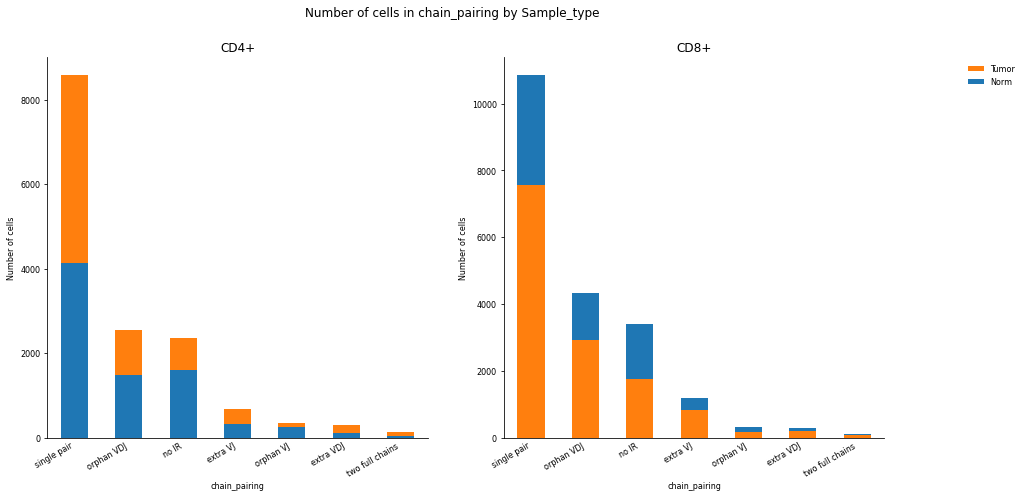

In [279]:
args = "chain_pairing", "tumor"
kwargs = {'groupby': "chain_pairing", 'target_col': "Sample_type"}
labels=['CD4+', 'CD8+']

plot_pair(ir.pl.group_abundance, adata_filtered, cd4_mask, labels,
          **kwargs)

In [282]:
print(
    "Fraction of cells with more than one pair of TCRs: {:.2f}".format(
        np.sum(
            adata_filtered.obs["chain_pairing"].isin(
                ["extra VJ", "extra VDJ", "two full chains"]
            )
        )
        / adata_filtered.n_obs
    )
)

Fraction of cells with more than one pair of TCRs: 0.07


In [284]:
adata_filtered.obs['chain_pairing'].value_counts()

single pair        19445
orphan VDJ          6864
no IR               5778
extra VJ            1847
orphan VJ            659
extra VDJ            561
two full chains      231
Name: chain_pairing, dtype: int64

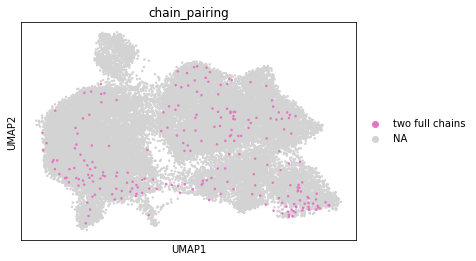

In [285]:
sc.pl.umap(adata_filtered, color="chain_pairing", groups="two full chains", size=25)

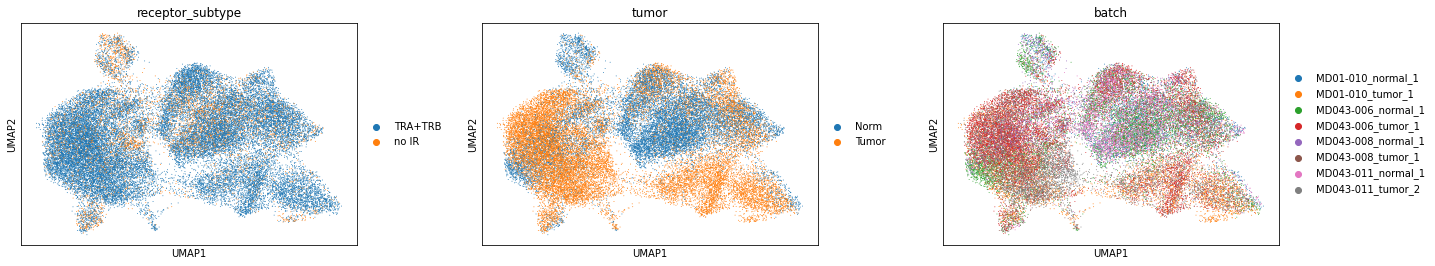

In [304]:
sc.pl.umap(adata_filtered, color=['receptor_subtype', 'tumor', 'batch'], wspace=.25)

In [301]:
batch2perc = dict()
for sample in adata_filtered.obs['batch'].unique():
    vc = adata_filtered[adata_filtered.obs['batch'] == sample].obs['receptor_type'].value_counts()
    try:
        batch2perc[sample] = vc.loc['TCR'] / vc.sum()
    except:
        batch2perc[sample] = 0.01
batch2perc

{'MD01-010_normal_1': 0.5515339538090314,
 'MD01-010_tumor_1': 0.8358106563000228,
 'MD043-006_normal_1': 0.8825365300042559,
 'MD043-006_tumor_1': 0.8912073082113567,
 'MD043-008_normal_1': 0.7605633802816901,
 'MD043-008_tumor_1': 0.7671469740634006,
 'MD043-011_normal_1': 0.7808948863636364,
 'MD043-011_tumor_2': 0.9258635214827295}

<AxesSubplot:>

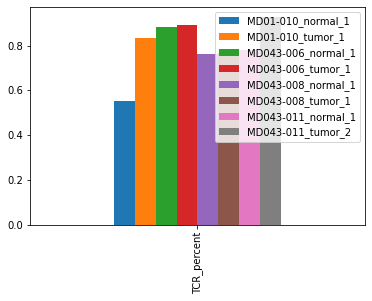

In [302]:
pd.DataFrame(batch2perc, index=['TCR_percent']).plot.bar()

### Clonotype network

In [294]:
ir.pp.ir_dist(adata_filtered)
ir.tl.define_clonotypes(adata_filtered, receptor_arms="all", dual_ir="primary_only")

  0%|          | 0/12817 [00:00<?, ?it/s]

In [308]:
ir.tl.clonotype_network(adata_filtered, min_cells=2)

In [423]:
ir.pp.ir_dist(
    adata_filtered,
    metric="alignment",
    sequence="aa",
    cutoff=10,
)

  0%|          | 0/18528 [00:00<?, ?it/s]

  0%|          | 0/24090 [00:00<?, ?it/s]

In [424]:
ir.tl.define_clonotype_clusters(
    adata_filtered, sequence="aa", metric="alignment", receptor_arms="all", dual_ir="any"
)

  0%|          | 0/13292 [00:00<?, ?it/s]

In [427]:
ir.tl.clonotype_network(adata_filtered, min_cells=12, sequence="aa", metric="alignment")

In [540]:
ir.pl.clonotype_network?

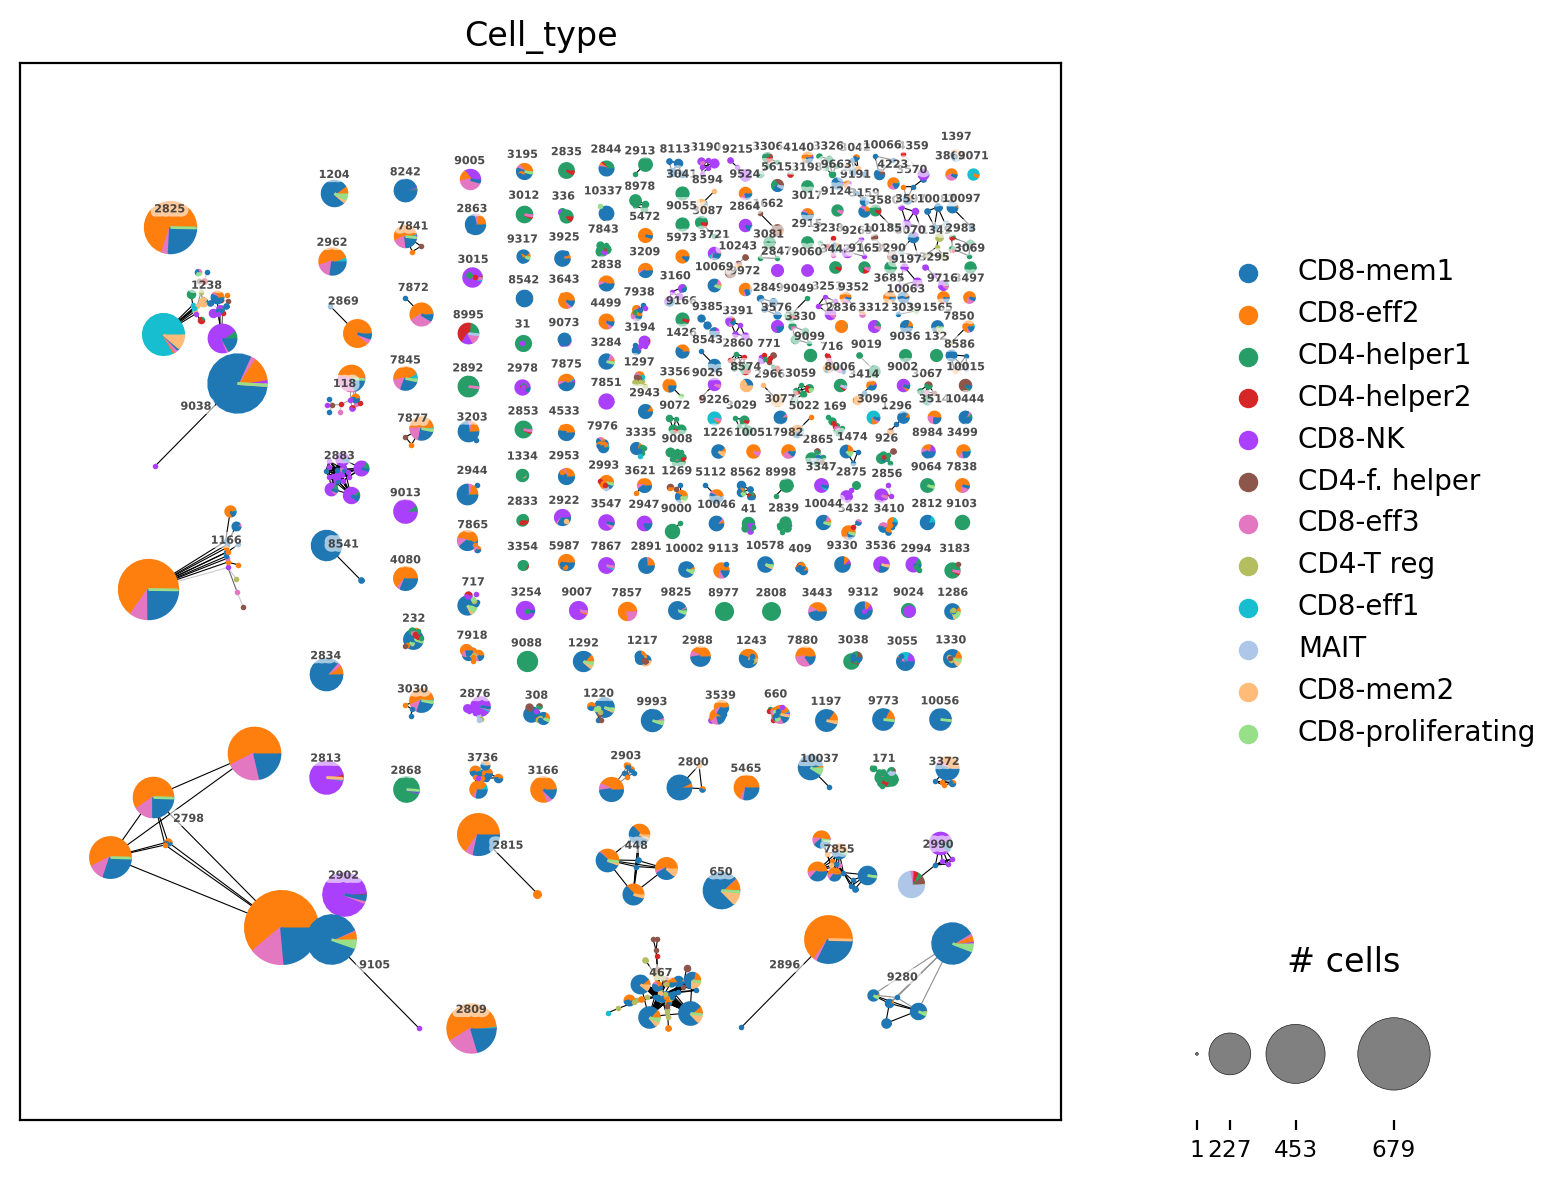

In [543]:
with plt.rc_context({"figure.dpi": (200)}):
    ir.pl.clonotype_network(
        adata_filtered, color="Cell_type", label_fontsize=4, panel_size=(7, 7), base_size=1
    )

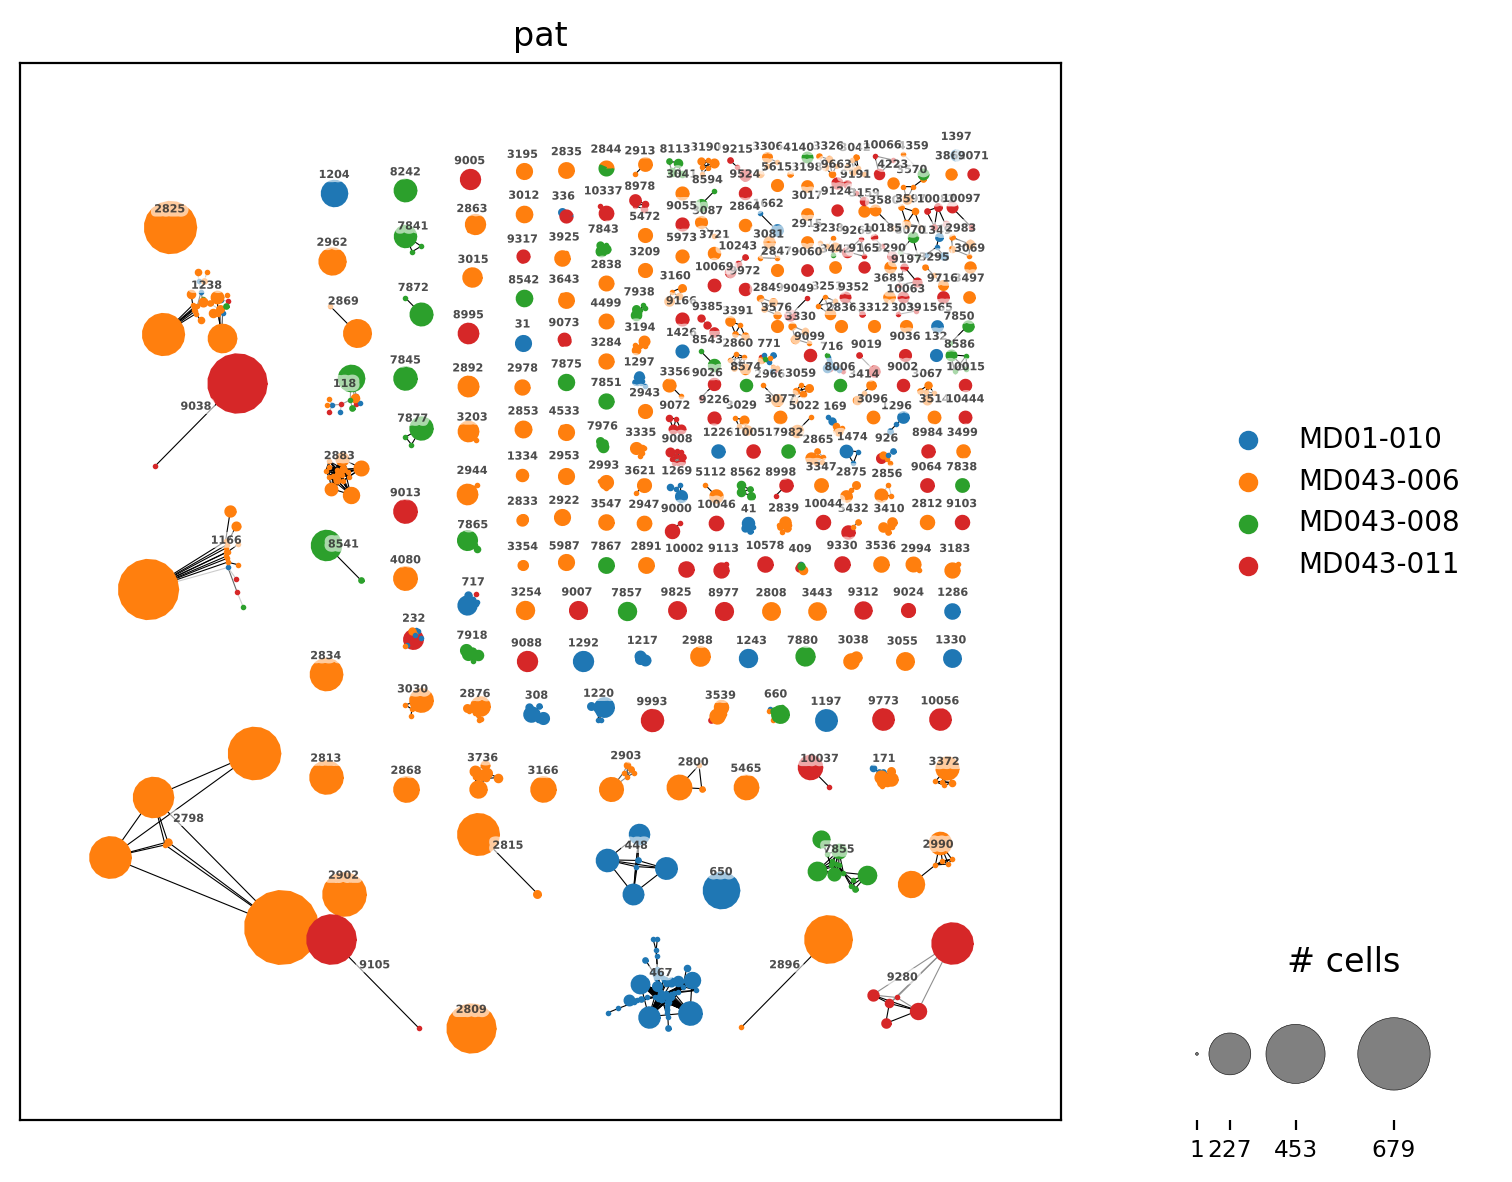

In [542]:
with plt.rc_context({"figure.dpi": (200)}):
    ir.pl.clonotype_network(
        adata_filtered, color="pat", label_fontsize=4, panel_size=(7, 7), base_size=1
    )

<AxesSubplot:>

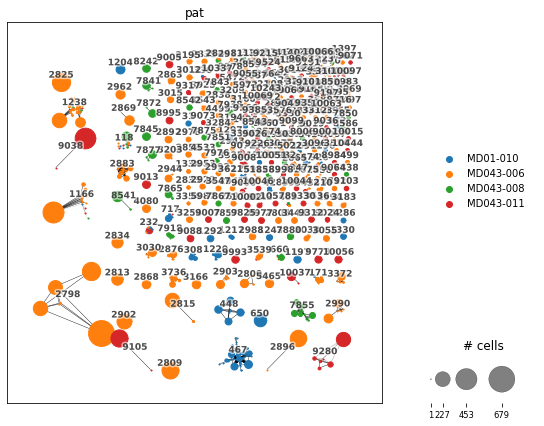

In [428]:
ir.pl.clonotype_network(
    adata_filtered, color="pat", label_fontsize=9, panel_size=(7, 7), base_size=1
)

> We see a huge clonotype cluster that is not patient specific! That illustrates specificity to a common pathogen

### Clonal expansion

Text(0.5, 0.98, 'Clonal expansion')

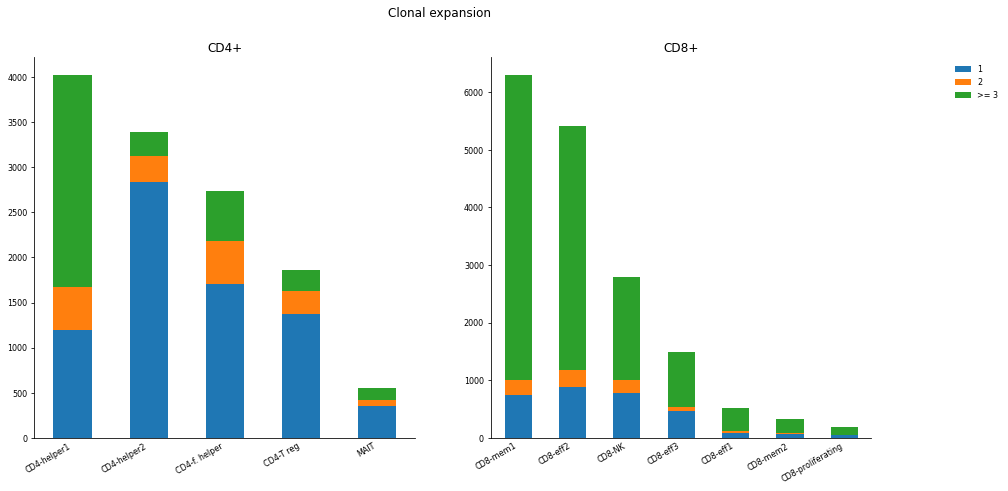

In [341]:
kwargs = {'groupby': 'Cell_type', 'clip_at': 3, 'normalize': False}
labels=['CD4+', 'CD8+']

plot_pair(ir.pl.clonal_expansion, adata_filtered, cd4_mask, labels,
          **kwargs)
plt.suptitle('Clonal expansion')

Text(0.5, 0.98, 'Clonal expansion')

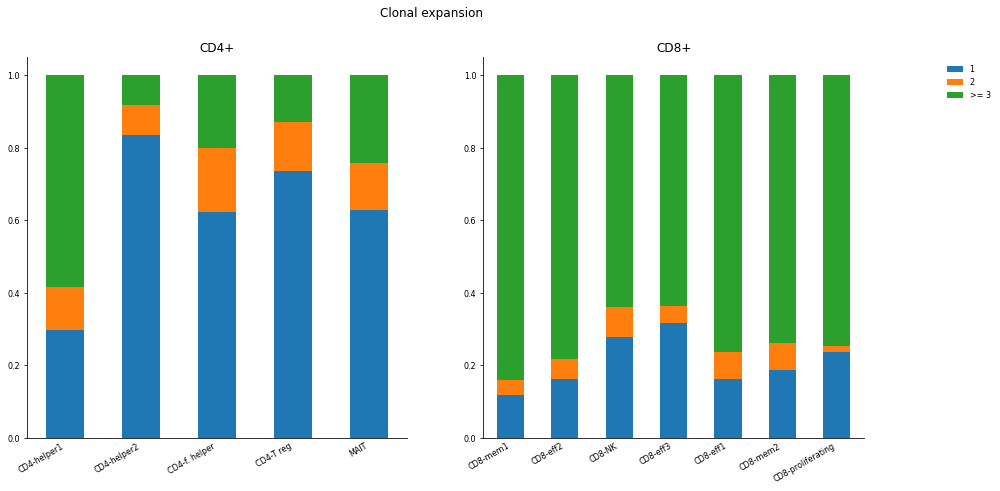

In [343]:
kwargs = {'groupby': "Cell_type", 'clip_at': 3, 'normalize': True}

plot_pair(ir.pl.clonal_expansion, adata_filtered, cd4_mask, labels,
          **kwargs)
plt.suptitle('Clonal expansion');

> CD8+ T-cells (namely mem1&2, eff1&2) have a large fraction of expanded clonotypes

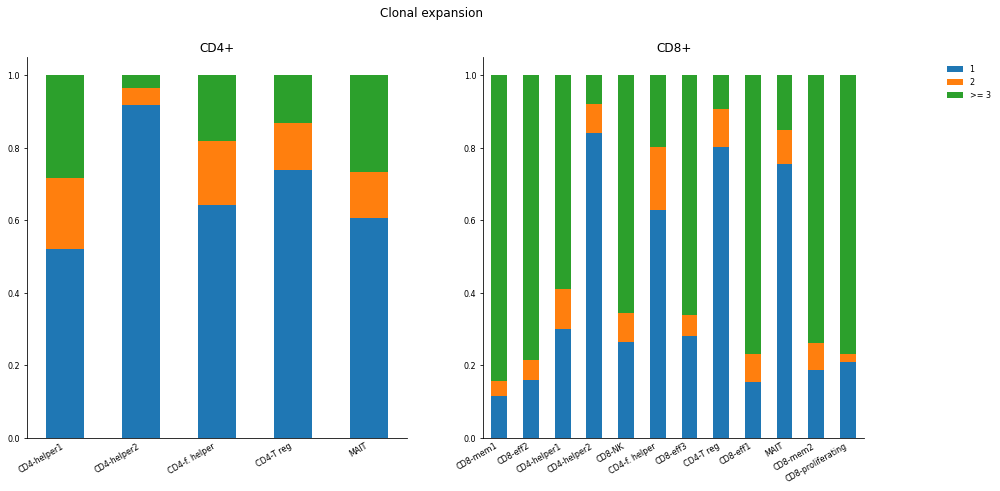

In [352]:
kwargs = {'groupby': "Cell_type", 'clip_at': 3, 'normalize': True}

plot_pair(ir.pl.clonal_expansion, adata_filtered, cd4_mask, labels,
          **kwargs)
plt.suptitle('Clonal expansion');

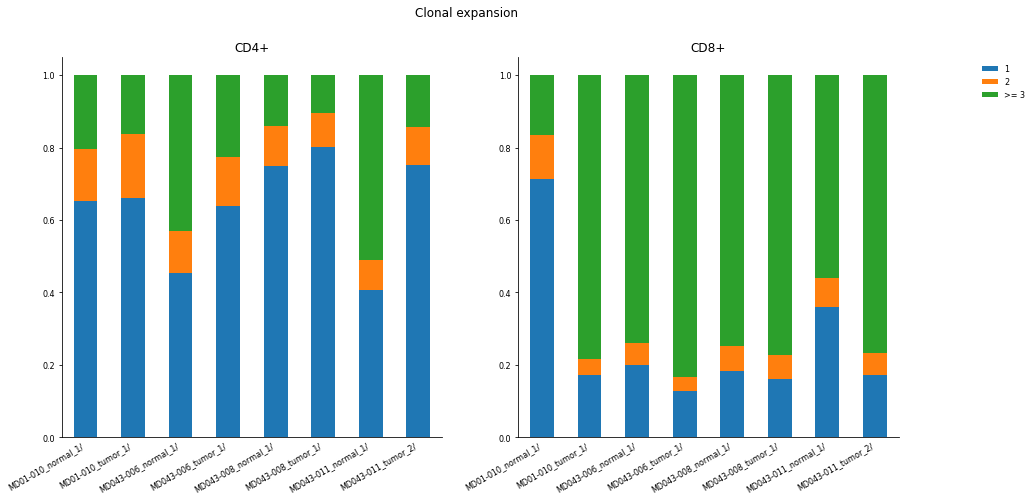

In [566]:
kwargs = {'groupby': "sample", 'clip_at': 3, 'normalize': True}

plot_pair(ir.pl.clonal_expansion, adata_filtered, cd4_mask, labels,
          **kwargs)
plt.suptitle('Clonal expansion');

### TCR diversity

> Consistent with this observation, they have the lowest `alpha_diversity` of clonotypes.

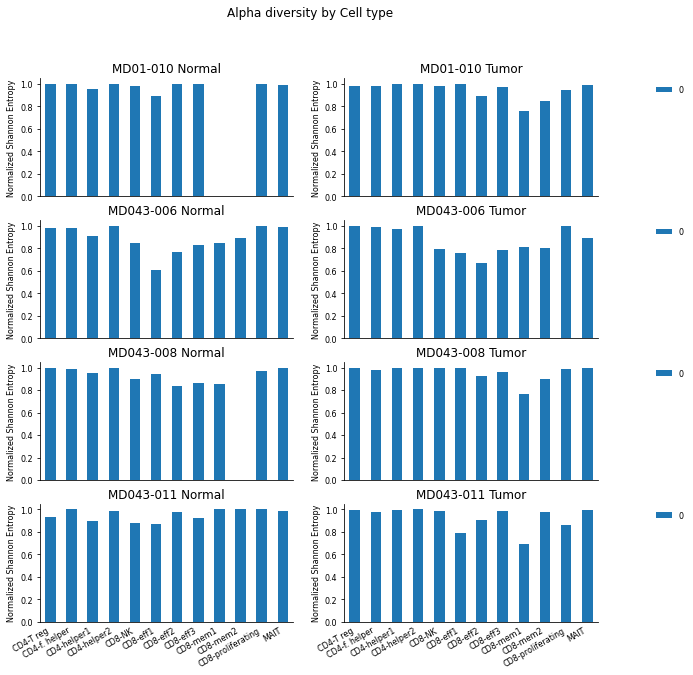

In [335]:
fig, axs = plt.subplots(ncols=2, nrows=adata_filtered.obs.pat.nunique(), figsize=(10, 10), squeeze=False, sharex=True) 

for i, pat in enumerate(adata_filtered.obs.pat.unique()):
    adata = adata_filtered[adata_filtered.obs.pat == pat]
    
    adata_n = adata[adata.obs['tumor'] == 'Norm']
    ir.tl.alpha_diversity(adata_n, groupby='Cell_type')
    ir.pl.alpha_diversity(adata_n, groupby='Cell_type', ax=axs[i][0])
    axs[i][0].set_title(pat+' Normal')

    
    adata_t = adata[adata.obs['tumor'] != 'Norm']
    ir.tl.alpha_diversity(adata_t, groupby='Cell_type')
    ir.pl.alpha_diversity(adata_t, groupby='Cell_type', ax=axs[i][1])
    axs[i][1].set_title(pat+' Tumor')
    
plt.suptitle('Alpha diversity by Cell type')
plt.show()

In [473]:
from platform import python_version
python_version()

'3.8.11'

> CD8 memory cells are sometimes completely absent in normal cells, that may be due to the low population of that cells in normal tissue and lack of sequencing outputs for them

In [474]:
ir.__version__

'0.12.0'

### Clonotype abundance

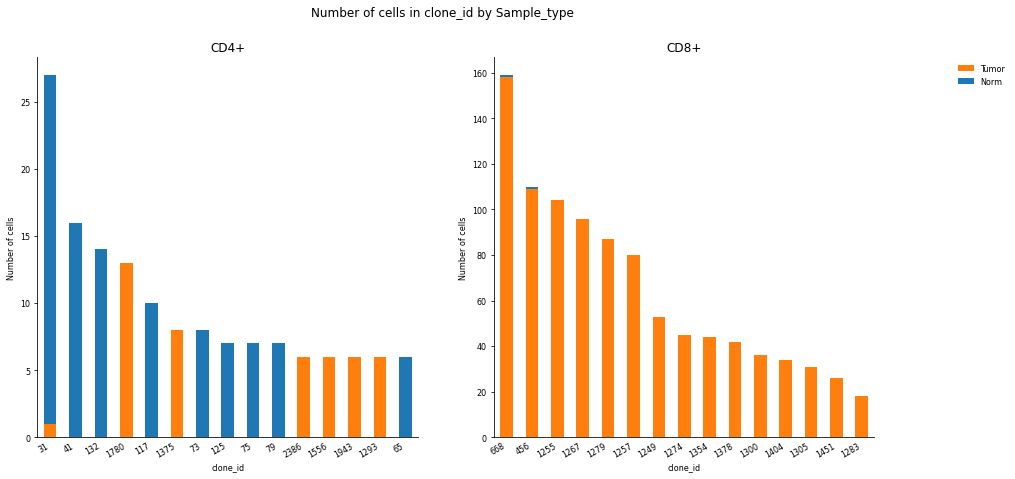

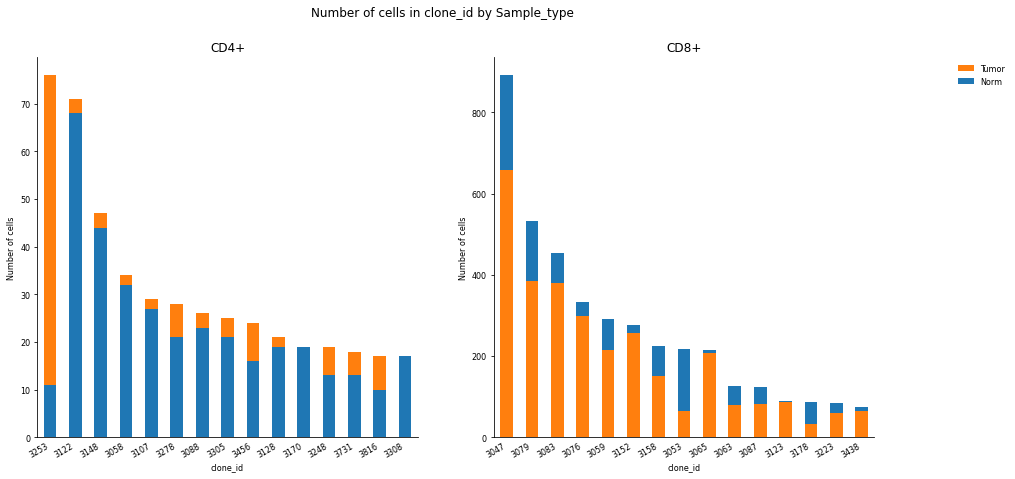

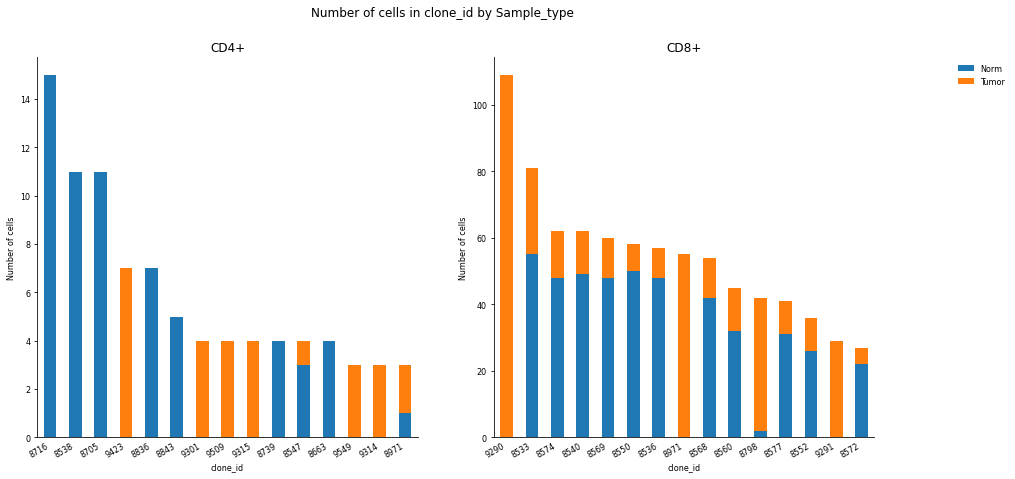

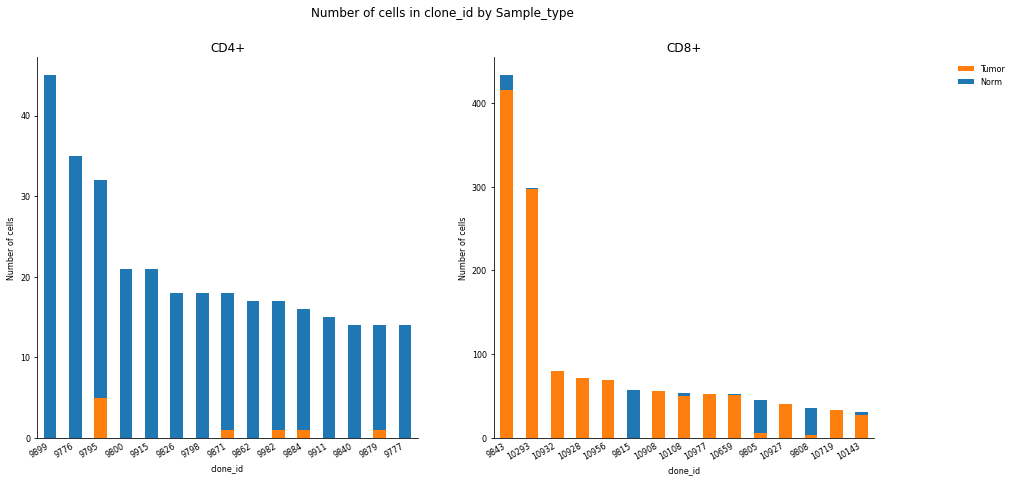

In [344]:
kwargs = {'groupby': "clone_id",  'target_col': "Sample_type", 'max_cols': 15}

adata_filtered.obs['cd4_mask'] = cd4_mask
for pat in adata_filtered.obs.pat.unique():
    pat_mask = adata_filtered.obs.pat == pat
    cd4_pat_mask = adata_filtered[pat_mask].obs.cd4_mask
    plot_pair(ir.pl.group_abundance, adata_filtered[pat_mask], cd4_pat_mask, labels,
              **kwargs)

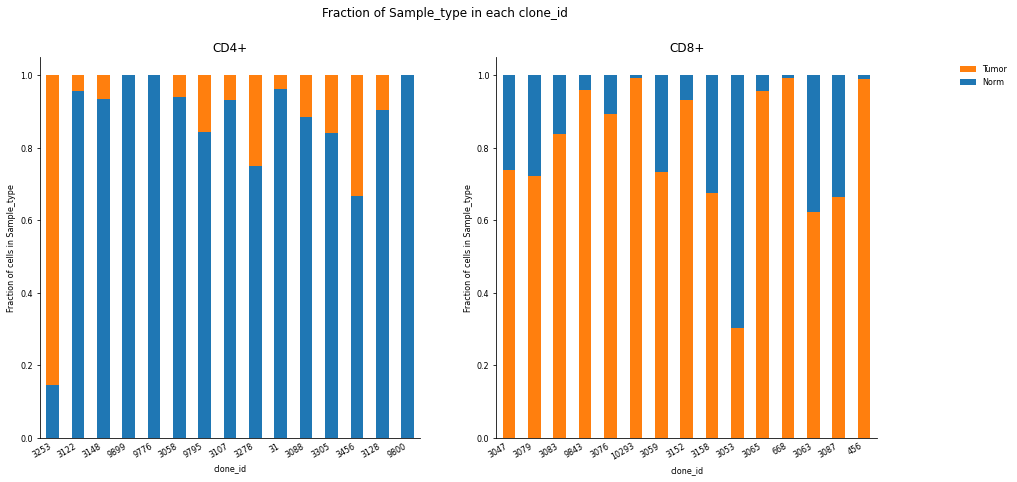

In [345]:
kwargs = {'groupby': "clone_id",  'target_col': "Sample_type", 'max_cols': 15, 'normalize': True}

plot_pair(ir.pl.group_abundance, adata_filtered, cd4_mask, labels,
          **kwargs)

<AxesSubplot:title={'center':'Number of cells in clone_id by Cell_type'}, xlabel='clone_id', ylabel='Number of cells'>

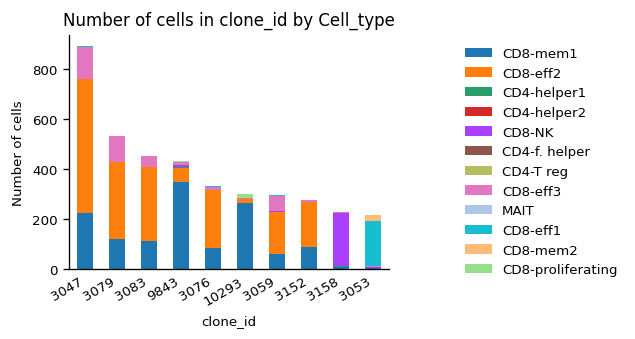

In [347]:
ir.pl.group_abundance(adata_filtered, groupby="clone_id", target_col="Cell_type", max_cols=10)

### VDJdb

In [354]:
vdjdb = ir.datasets.vdjdb()

/tmp/ipykernel_2242936/915710121.py:1: DtypeWarning: Columns (20,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  vdjdb = ir.datasets.vdjdb()


Processing VDJDB entries:   0%|          | 0/60055 [00:00<?, ?it/s]

/home/fgrigoriev/venvs/bior_38/lib/python3.8/site-packages/scirpy/io/_convert_anndata.py:81: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(obs=ir_df, X=np.empty([ir_df.shape[0], 0]))
/home/fgrigoriev/venvs/bior_38/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [355]:
ir.pp.ir_dist(adata_filtered, vdjdb, metric="identity", sequence="aa")

In [357]:
ir.tl.ir_query(
    adata_filtered, vdjdb, metric="identity", sequence="aa", receptor_arms="any", dual_ir="any"
)

  0%|          | 0/13292 [00:00<?, ?it/s]

In [358]:
ir.tl.ir_query_annotate(
    adata_filtered,
    vdjdb,
    metric="identity",
    sequence="aa",
    include_ref_cols=["antigen.species"],
    strategy="most-frequent",
)

  0%|          | 0/3766 [00:00<?, ?it/s]

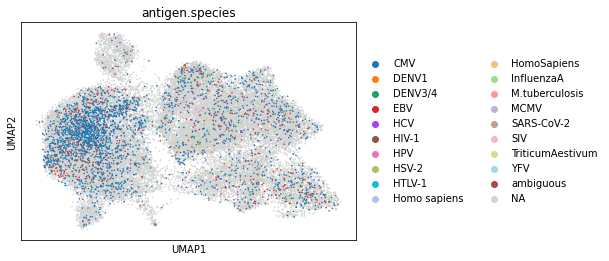

In [446]:
sc.pl.umap(adata_filtered, color="antigen.species", size=10)

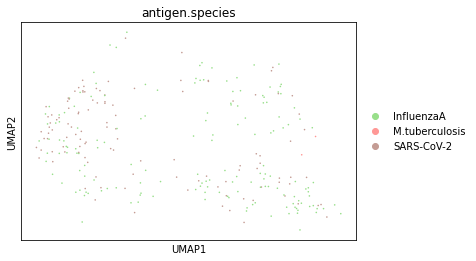

In [590]:
lung_pathogens = ['InfluenzaA', 'SARS-CoV-2', 'M.tuberculosis']
lung_pathogens = ['InfluenzaA', 'SARS-CoV-2', 'M.tuberculosis']
lung_pathogen_mask = adata_filtered.obs['antigen.species'].isin(lung_pathogens)

sc.pl.umap(adata_filtered[lung_pathogen_mask & tumor_mask], color="antigen.species", size=10)

In [602]:
len(adata_filtered[lung_pathogen_mask & ~tumor_mask & ~cd4_mask]) / (~tumor_mask  & ~cd4_mask).sum()

0.015282583621683967

In [603]:
len(adata_filtered[lung_pathogen_mask & tumor_mask & ~cd4_mask]) / (tumor_mask  & ~cd4_mask).sum()

0.011099600414385083

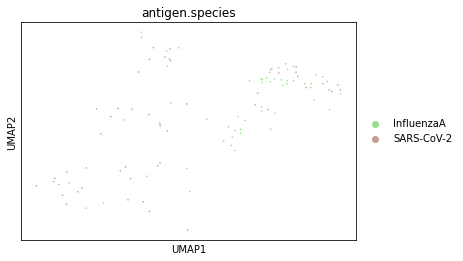

In [605]:
lung_pathogens = ['InfluenzaA', 'SARS-CoV-2', 'M.tuberculosis']
lung_pathogen_mask = adata_filtered.obs['antigen.species'].isin(lung_pathogens)

sc.pl.umap(adata_filtered[lung_pathogen_mask & ~tumor_mask & ~cd4_mask], color="antigen.species", size=10)

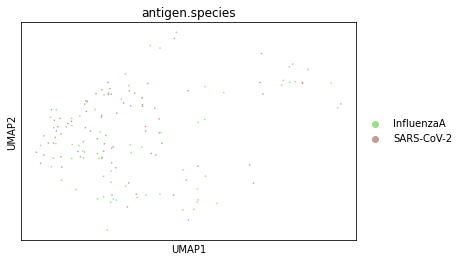

In [606]:
lung_pathogens = ['InfluenzaA', 'SARS-CoV-2', 'M.tuberculosis']
lung_pathogen_mask = adata_filtered.obs['antigen.species'].isin(lung_pathogens)

sc.pl.umap(adata_filtered[lung_pathogen_mask & tumor_mask & ~cd4_mask], color="antigen.species", size=10)

In [361]:
adata_filtered.obs['antigen.species'].value_counts()

CMV                 2531
ambiguous            338
InfluenzaA           293
EBV                  235
SARS-CoV-2           212
HomoSapiens           72
YFV                   29
HIV-1                 20
HCV                   17
HSV-2                  4
DENV1                  3
MCMV                   2
DENV3/4                2
M.tuberculosis         2
HTLV-1                 2
SIV                    1
TriticumAestivum       1
HPV                    1
Homo sapiens           1
Name: antigen.species, dtype: int64

In [455]:
adata_filtered.obs.groupby('pat').count()

sample  tumor  batch  response_status  n_genes_by_counts  \
pat                                                                   
MD01-010     7274   7274   7274             7274               7274   
MD043-006   16682  16682  16682            16682              16682   
MD043-008    3865   3865   3865             3865               3865   
MD043-011    7564   7564   7564             7564               7564   

           total_counts  total_counts_mt  pct_counts_mt  total_counts_rp  \
pat                                                                        
MD01-010           7274             7274           7274             7274   
MD043-006         16682            16682          16682            16682   
MD043-008          3865             3865           3865             3865   
MD043-011          7564             7564           7564             7564   

           pct_counts_rp  ...  chain_pairing  T_Cell_type  has_ir_bool  \
pat                       ...                                            
MD01-010            7274  ...           7274         7274         7274   
MD043-006          16682  ...          16682        16682        16682   
MD043-008           3865  ...           3865         3865         3865   
MD043-011           7564  ...           7564         7564         7564   

           has_ir_str  clone_id  clone_id_size  cc_aa_alignment  \
pat                                                               
MD01-010         7274      5255           5255             5255   
MD043-006       16682     14806          14806            14806   
MD043-008        3865      2951           2951             2951   
MD043-011        7564      6595           6595             6595   

           cc_aa_alignment_size  cd4_mask  antigen.species  
pat                                                         
MD01-010                   5255      7274              414  
MD043-006                 14806     16682             2257  
MD043-008                  2951      3865              486  
MD043-011                  6595      7564              609  

[4 rows x 72 columns]

In [467]:
vc = adata_filtered.obs.groupby('pat')['antigen.species'].value_counts()
for pat in adata_filtered.obs.pat.unique():
    print(pat, end='\n\n')
    print(vc[vc > 1].loc[pat] / vc[vc > 1].loc[pat].sum(), end='\n\n')

MD01-010

CMV            0.539024
ambiguous      0.124390
InfluenzaA     0.102439
EBV            0.092683
SARS-CoV-2     0.085366
HomoSapiens    0.031707
HIV-1          0.012195
HCV            0.007317
YFV            0.004878
Name: antigen.species, dtype: float64

MD043-006

CMV               0.715047
ambiguous         0.082557
InfluenzaA        0.063027
SARS-CoV-2        0.058145
EBV               0.050599
YFV               0.010209
HomoSapiens       0.008877
HCV               0.004439
HIV-1             0.004439
HSV-2             0.001775
M.tuberculosis    0.000888
Name: antigen.species, dtype: float64

MD043-008

CMV            0.690722
ambiguous      0.103093
InfluenzaA     0.088660
EBV            0.072165
SARS-CoV-2     0.030928
HomoSapiens    0.010309
YFV            0.004124
Name: antigen.species, dtype: float64

MD043-011

CMV            0.600660
InfluenzaA     0.108911
ambiguous      0.084158
EBV            0.079208
HomoSapiens    0.056106
SARS-CoV-2     0.051155
HCV            

In [448]:
pub_clone = adata_filtered.obs.loc[adata_filtered.obs["cc_aa_alignment"] == "1238", :]
pub_clone['antigen.species'].value_counts()

CMV                 8
ambiguous           1
DENV3/4             0
InfluenzaA          0
YFV                 0
TriticumAestivum    0
SIV                 0
SARS-CoV-2          0
MCMV                0
M.tuberculosis      0
HomoSapiens         0
EBV                 0
DENV1               0
HTLV-1              0
HSV-2               0
HPV                 0
HIV-1               0
HCV                 0
Homo sapiens        0
Name: antigen.species, dtype: int64

In [450]:
pub_clone.pat.value_counts()

MD043-006    368
MD01-010       4
MD043-008      3
MD043-011      1
Name: pat, dtype: int64

In [449]:
pub_clone1 = adata_filtered.obs.loc[adata_filtered.obs["cc_aa_alignment"] == "118", :]
pub_clone1['antigen.species'].value_counts()

EBV                 2
CMV                 1
SARS-CoV-2          1
HomoSapiens         0
YFV                 0
TriticumAestivum    0
SIV                 0
MCMV                0
M.tuberculosis      0
InfluenzaA          0
Homo sapiens        0
DENV1               0
HTLV-1              0
HSV-2               0
HPV                 0
HIV-1               0
HCV                 0
DENV3/4             0
ambiguous           0
Name: antigen.species, dtype: int64

In [451]:
pub_clone1.pat.value_counts()

MD043-008    84
MD043-006     8
MD043-011     4
MD01-010      3
Name: pat, dtype: int64

### Clonotype modularity

In [478]:
ir.tl.clonotype_modularity(adata_filtered, target_col="cc_aa_alignment")

  0%|          | 0/11778 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

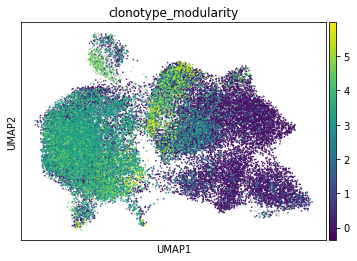

In [484]:
sc.pl.umap(adata_filtered, color="clonotype_modularity", size=10)

<AxesSubplot:>

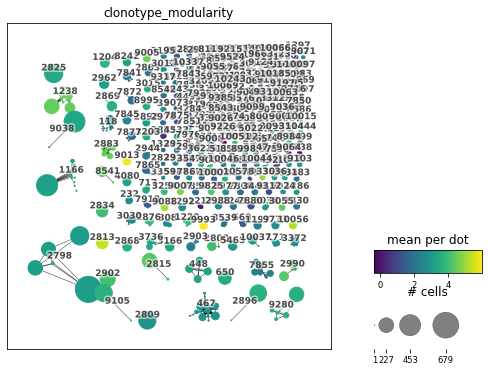

In [483]:
ir.pl.clonotype_network(
    adata_filtered,
    color="clonotype_modularity",
    label_fontsize=9,
    panel_size=(6, 6),
    base_size=1,
)

In [519]:
# # Saving the results!
# adata_filtered.write_h5ad('/home/fgrigoriev/proj/sc/adata_filtered_clean_tcr.h5ad')